# 📊 Car Price Prediction — Machine Learning Project

## 📌 Objective
The goal of this project is to build a predictive model for car prices.  
We’ll walk through a complete Machine Learning pipeline:
- Load and clean the dataset
- Perform Exploratory Data Analysis (EDA)
- Handle missing values and outliers
- Encode categorical features
- Train and evaluate regression models
- Compare model performances and feature importance

---


In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder



In [ ]:
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Section 1: Data Exploration (EDA)

* The dataset was loaded using the Pandas library (`pd.read_csv('your_dataset.csv')`).
* The first five rows were displayed using `.head()`.
* Missing values were checked using `.isnull().sum()`.
* Data types were identified using `.dtypes`, distinguishing numerical and categorical features.

In [ ]:
df = pd.read_csv('/content/cars_price.csv')

In [ ]:
df.shape

(30330, 26)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        3.0               NaN  alfa-romero       gas        std          two   
1        3.0                 ?  alfa-romero       gas        std          two   
2        1.0                 ?  alfa-romero       gas        std          two   
3        2.0               164         audi       gas        std         four   
4        2.0               164         audi       gas        std          NaN   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd             NaN        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4     NaN    NaN   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0     NaN       2548.0        dohc              NaN          NaN        mpfi   
1    48.8       2548.0         NaN             four        130.0        mpfi   
2    52.4       2823.0        ohcv              six        152.0        mpfi   
3    54.3       2337.0         ohc             four        109.0        mpfi   
4    54.3       2824.0         NaN             five        136.0        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111      NaN      21.0         27.0   
1  3.47   2.68                9.0        111      NaN      21.0         27.0   
2   NaN   3.47                9.0        154      NaN      19.0         26.0   
3  3.19    NaN               10.0        102     5500      24.0         30.0   
4   NaN    3.4                8.0        115     5500      18.0         22.0   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [ ]:
df.duplicated().sum()

np.int64(4456)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# calculate null percentage of each columns.

null_percentage = (df.isnull().sum()/len(df)) * 100
null_percentage.sort_values(ascending=False)

horsepower           11.695138
drive-wheels         11.556002
make                 11.474840
city-mpg             11.432326
length               11.413001
wheel-base           11.378218
fuel-system          11.378218
height               11.362758
engine-size          11.324109
normalized-losses    11.289325
num-of-cylinders     11.289325
symboling            11.258406
price                11.258406
engine-type          11.254541
num-of-doors         11.219757
highway-mpg          11.215892
curb-weight          11.196568
fuel-type            11.177244
body-style           11.111541
peak-rpm             11.103811
compression-ratio    11.080621
engine-location      11.014918
aspiration           10.987864
bore                 10.987864
width                10.898972
stroke               10.864188
dtype: float64

In [ ]:
# Drop columns with greater than 40% null values

remove_cols = null_percentage[null_percentage > 40].keys().tolist()
df.drop(remove_cols, axis=1, inplace=True)

In [ ]:
obj_cols = df.select_dtypes(include='object').columns

In [ ]:
# Explore objects columns

for col in obj_cols:
  print(df[col].unique())
  print(len(df[col].value_counts()))
  print(df[col].value_counts())
  print("================")

[nan '?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '161' '153' '125' '128' '103' '122' '108' '194' '231' '119' '154' '74'
 '186' '83' '102' '89' '87' '77' '91' '168' '134' '65' '197' '90' '94'
 '256' '95' '142']
52
normalized-losses
?      4660
161    1294
91      870
150     800
104     710
134     678
128     645
102     606
94      570
85      557
65      546
95      538
168     535
103     529
74      514
93      468
106     459
122     435
148     434
118     413
125     346
137     338
83      325
154     322
115     318
101     311
197     248
153     242
188     238
145     236
113     233
119     232
108     232
81      230
194     228
110     227
129     225
89      214
87      209
158     207
164     205
192     198
121     126
256     125
77      123
90      114
142     113
186     112
231     110
98      107
78      102
107      96
Name: count, dtype: int64
['alfa-romero' 'audi' na

## Handling Garbage Values and Data Type Conversion

This step involves cleaning the dataset by identifying and replacing any "garbage" values with `NaN` (Not a Number), which is the standard way to represent missing data in Pandas. Additionally, the data types of the columns will be reviewed and changed if they are not appropriate for the data they contain or for subsequent analysis and modeling.

In [ ]:
df["normalized-losses"] = df["normalized-losses"].replace('?', np.nan)

In [ ]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')

In [ ]:
df["num-of-doors"] = df["num-of-doors"].replace('?', np.nan)

In [ ]:
df["bore"] = df["bore"].replace('?', np.nan)

In [ ]:
df["bore"] = pd.to_numeric(df["bore"], errors='coerce')

In [ ]:
df["stroke"] = df["stroke"].replace('?', np.nan)

In [ ]:
df["stroke"] = pd.to_numeric(df["stroke"], errors='coerce')

In [ ]:
df["horsepower"] = df["horsepower"].replace('?', np.nan)

In [ ]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')

In [ ]:
df["peak-rpm"] = df["peak-rpm"].replace('?', np.nan)

In [ ]:
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], errors='coerce')

In [ ]:
df["price"] = df["price"].replace('?', np.nan)

In [ ]:
df["price"] = pd.to_numeric(df["price"], errors='coerce')

In [ ]:
# Drop rows where target value "price" value is null.

df.dropna(subset=["price"], inplace=True)

## Exploring and Filling NaN Values in Object Columns

This step focuses on examining the count of missing values (`NaN`) specifically within columns having an `object` data type (which typically represent categorical or string data). If the number of `NaN` values in these columns is below a certain threshold, we will proceed to fill them using an appropriate strategy.

In [ ]:
obj_cols = df.select_dtypes(include='O').columns
for col in obj_cols:
  print(col)
  print(df[col].isna().sum())
  print(len(df[col]))
  print(df[col].value_counts())
  print("=====================")

make
2593
22479
make
toyota           3154
nissan           1736
mazda            1697
mitsubishi       1336
honda            1259
subaru           1228
volkswagen       1193
peugot           1105
volvo            1038
dodge             879
bmw               814
mercedes-benz     792
plymouth          684
saab              626
audi              571
porsche           369
chevrolet         313
alfa-romero       303
jaguar            301
isuzu             206
renault           192
mercury            90
Name: count, dtype: int64
fuel-type
2543
22479
fuel-type
gas       17988
diesel     1948
Name: count, dtype: int64
aspiration
2476
22479
aspiration
std      16372
turbo     3631
Name: count, dtype: int64
num-of-doors
2741
22479
num-of-doors
four    11301
two      8437
Name: count, dtype: int64
body-style
2505
22479
body-style
sedan          9311
hatchback      6789
wagon          2531
hardtop         751
convertible     592
Name: count, dtype: int64
drive-wheels
2612
22479
drive-wheels
fwd 

In [ ]:
def fill_categorical_missing_values(cols):
  for col in obj_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
  return None

In [ ]:
fill_categorical_missing_values(obj_cols)

In [ ]:
num_cols = df.select_dtypes(exclude='O').columns
num_cols

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
# separate numerical categorical colmuns

def separate_categorical_col_by_value_count(cols, threshold=10):
    rem_cat_cols = []
    for col in cols:
        if df[col].nunique() <= threshold:
            rem_cat_cols.append(col)
    return rem_cat_cols

In [ ]:
rem_cat_cols = separate_categorical_col_by_value_count(num_cols)
rem_cat_cols

['symboling']

In [ ]:
# explore columns

for col in rem_cat_cols:
  print(col)
  print(df[col].unique())
  print(df[col].value_counts())
  print(df[col].isna().sum())
  print("=====================")

symboling
[ 3.  1.  2.  0. nan -1. -2.]
symboling
 0.0    6512
 1.0    5078
 2.0    3195
 3.0    2715
-1.0    2151
-2.0     282
Name: count, dtype: int64
2546


In [ ]:
# Convert negative values to positive

df['symboling'] = df['symboling'].abs()

In [ ]:
fill_categorical_missing_values(rem_cat_cols)

## Creating and Exploring Visualizations for Categorical Data

This step involves generating and analyzing various visualizations to understand the distribution and patterns within our categorical features and their relationship with the target variable (price). Visualizations help in gaining insights into the different categories, their frequencies, and how they might influence car prices.

In [ ]:
all_cat_cols = list(df.select_dtypes(include='O').columns) + rem_cat_cols

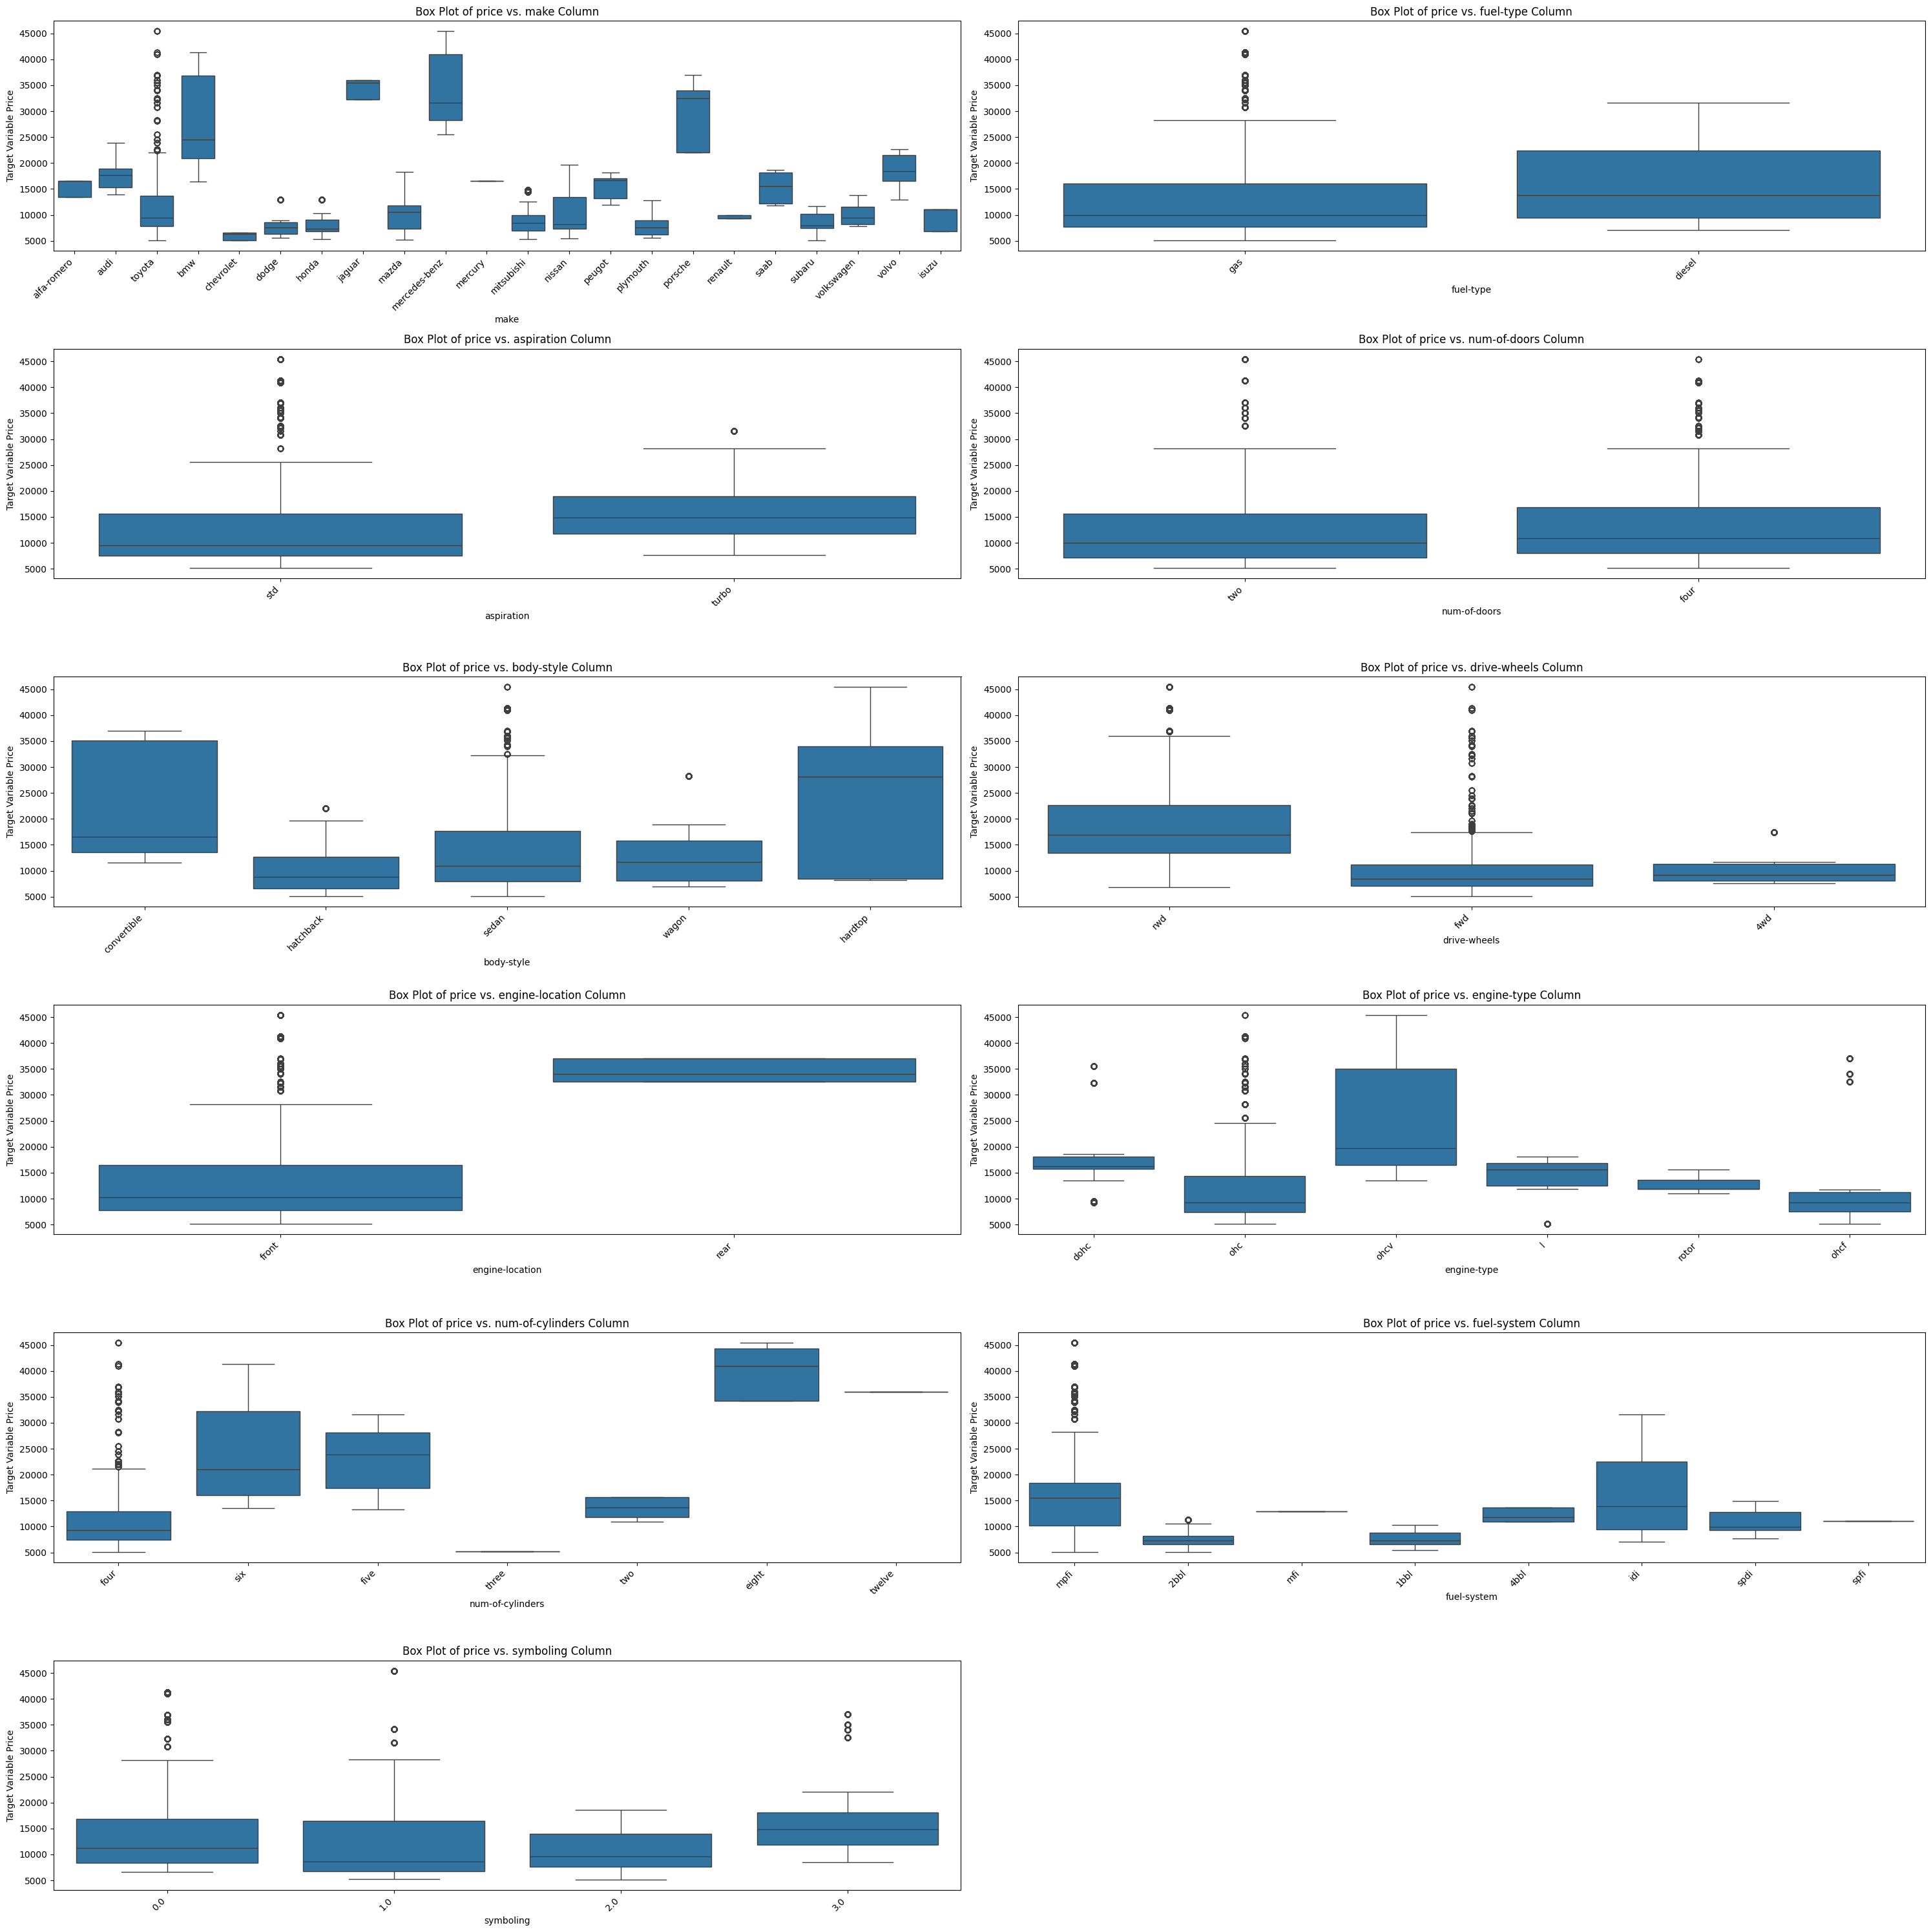

In [ ]:
# Create a box plot of each categorical colmuns to analyze the impact on target variable 'price'
n_cols = len(all_cat_cols)
cols_per_row = 2
rows_needed = int(np.ceil(n_cols / cols_per_row))

plt.figure(figsize=(15 * cols_per_row, 5 * rows_needed))

for index, col in enumerate(all_cat_cols):
    plt.subplot(rows_needed, cols_per_row, index + 1)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Box Plot of price vs. {col} Column')
    plt.xlabel(f'{col}')
    plt.ylabel('Target Variable Price')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Dropping Non-Impacting Categorical Columns

Based on our analysis (likely through visualizations or statistical tests), the following categorical columns were identified as not having a significant impact on the target variable ('price'):

In [ ]:
# drop irrelevent categorical columns

rem_col = [col for col in all_cat_cols if col in ["fuel-type","num-of-doors","fuel-system","symboling"]]
rem_col

['fuel-type', 'num-of-doors', 'fuel-system', 'symboling']

In [ ]:
df_dropped_list = df.drop(rem_col, axis=1, inplace=True)

## Exploring Numerical Columns

This step involves a detailed exploration of the numerical features in the dataset to understand their statistical properties and the extent of missing values. This analysis helps in identifying potential issues, understanding the distribution of the data, and informing subsequent preprocessing steps.

In [ ]:
num_cols = df.select_dtypes(exclude='O').columns

In [ ]:
def separate_numerial_col_by_value_count(cols, threshold=10):
    num_cols = []
    for col in cols:
        if df[col].nunique() > threshold:
            num_cols.append(col)
    return num_cols

In [ ]:
num_cols = separate_numerial_col_by_value_count(num_cols)

In [ ]:
for col in num_cols:
  print(col)
  print(df[col].isna().sum())
  print(df[col].describe())
  print("=====================")

normalized-losses
6235
count    16244.000000
mean       122.310145
std         35.430442
min         65.000000
25%         94.000000
50%        115.000000
75%        150.000000
max        256.000000
Name: normalized-losses, dtype: float64
wheel-base
2579
count    19900.000000
mean        98.853698
std          6.107847
min         86.600000
25%         94.500000
50%         97.000000
75%        102.400000
max        120.900000
Name: wheel-base, dtype: float64
length
2573
count    19906.000000
mean       174.332106
std         12.364065
min        141.100000
25%        166.800000
50%        173.200000
75%        184.325000
max        208.100000
Name: length, dtype: float64
width
2458
count    20021.000000
mean        65.896678
std          2.095348
min         60.300000
25%         64.200000
50%         65.500000
75%         66.600000
max         72.000000
Name: width, dtype: float64
height
2562
count    19917.000000
mean        53.778807
std          2.437634
min         47.800000
25% 

## Handling NaN Values in Numerical Columns and Visualizing Numerical Data

This step addresses the missing values (`NaN`) identified in the numerical columns and creates visualizations to further explore their distributions.

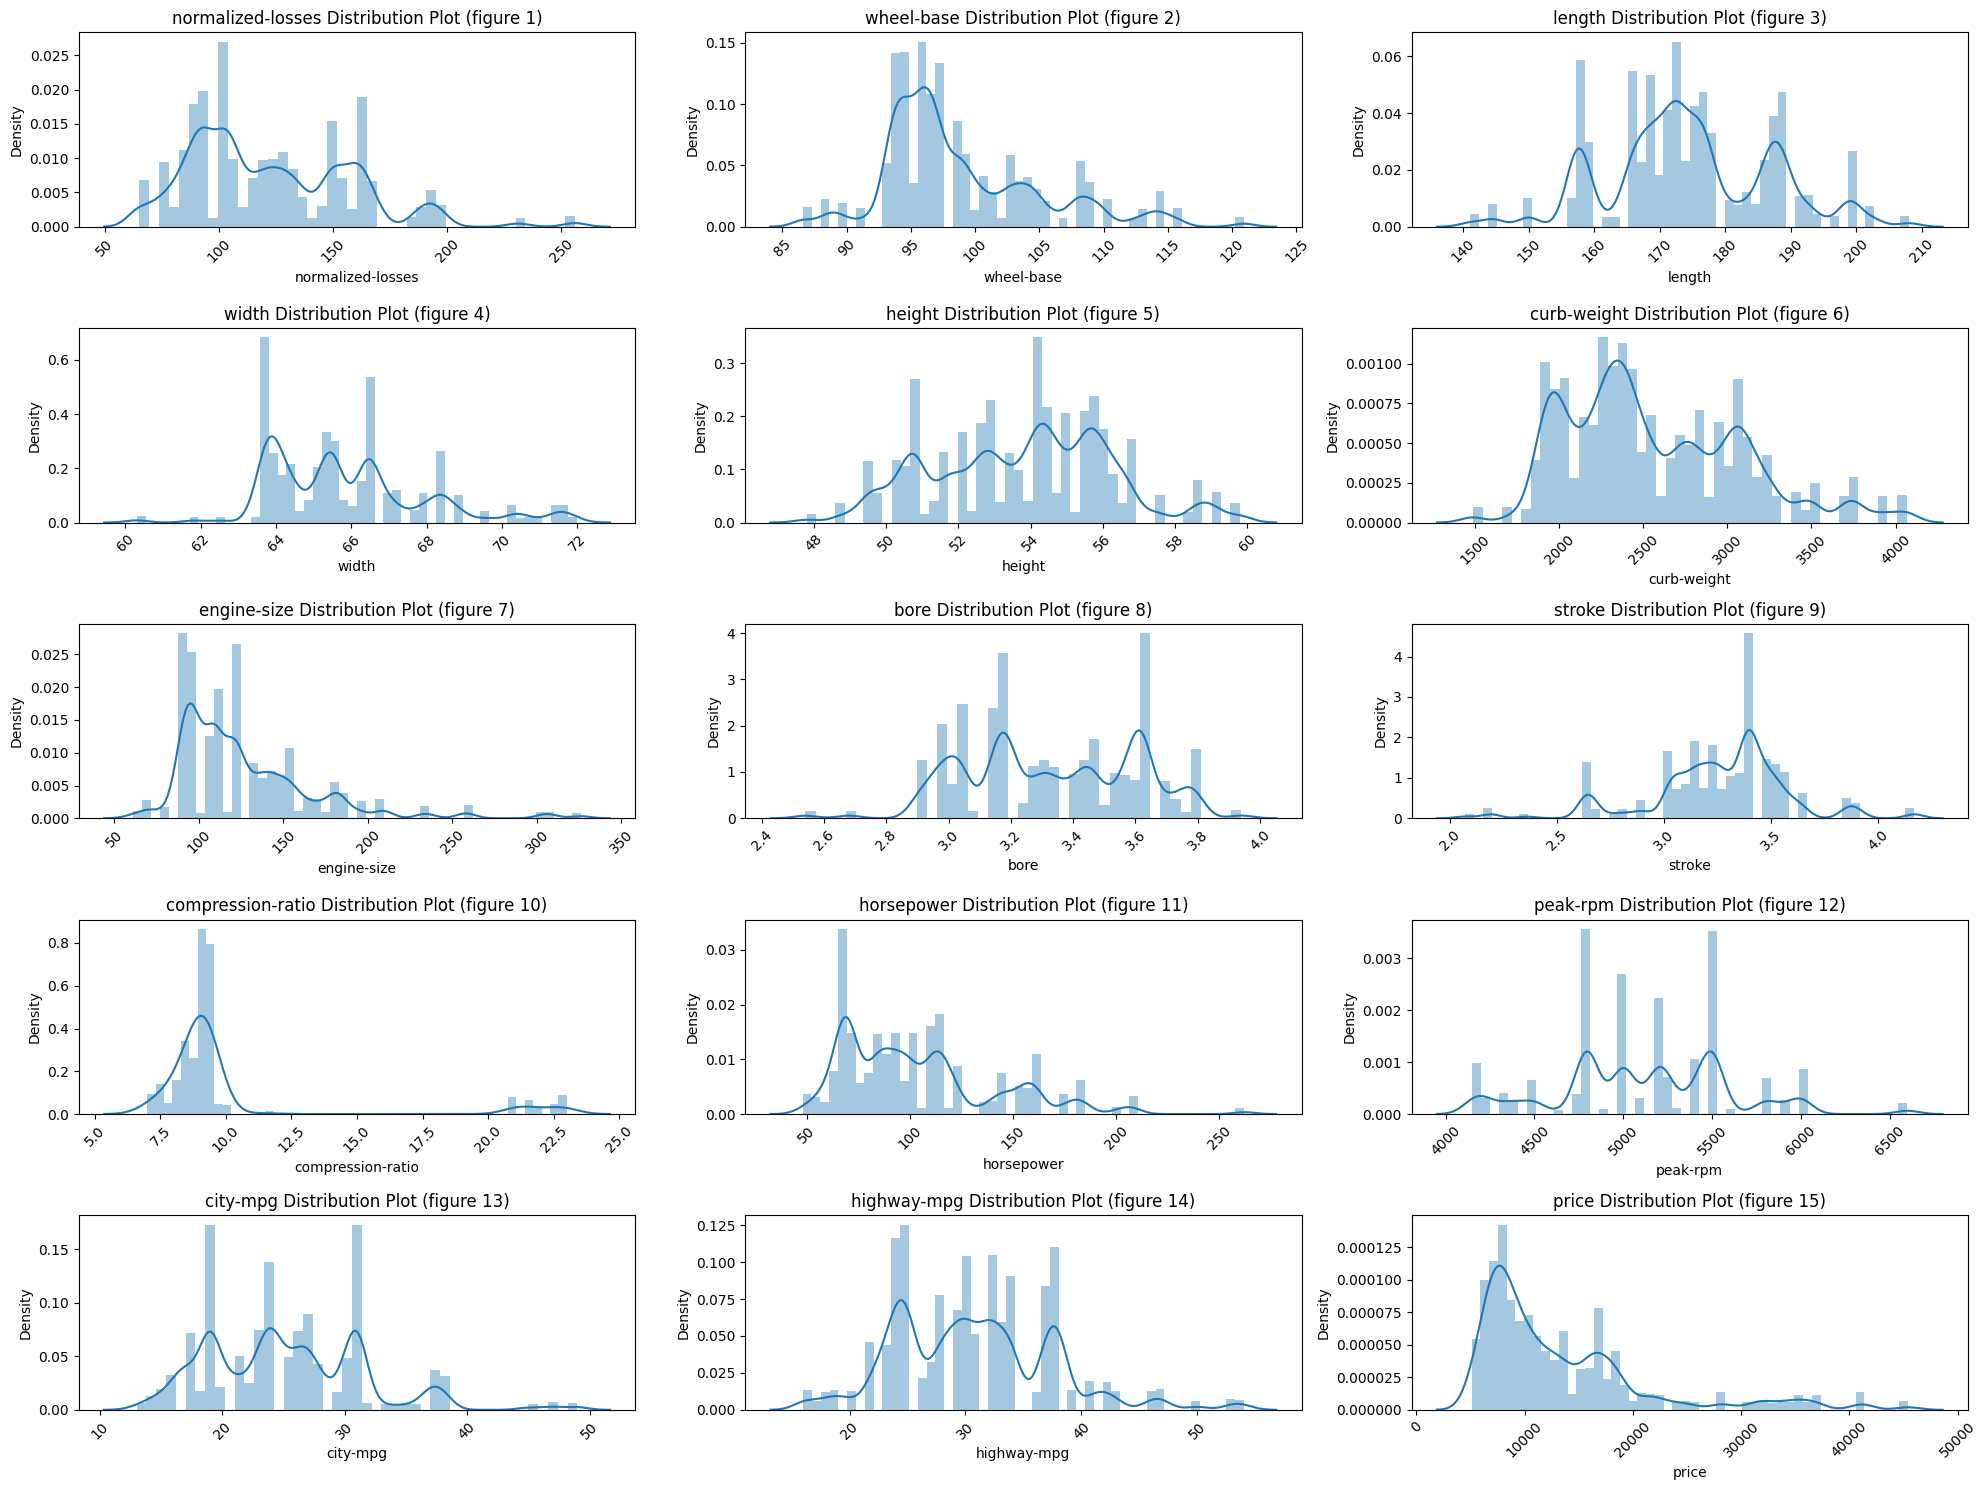

In [ ]:
# create a histogram to analyze the distribution of each numerical cols.
plt.figure(figsize=(20, 15))
num_rows = (len(num_cols) + 2) // 3
no_cols = 3

for index, col in enumerate(num_cols):
    plt.subplot(num_rows, no_cols, index + 1)
    sns.distplot(df[col])
    plt.title(f'{col} Distribution Plot (figure {index+1})')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*Based on above analysis, fill the missing values with median or mean. We used median for skewed and mean for unskewed data. As we can seee most of the cols are right skewed*

In [ ]:
df["normalized-losses"].fillna(value=df["normalized-losses"].median(), inplace=True)

In [ ]:
df["wheel-base"].fillna(value=df["wheel-base"].median(), inplace=True)

In [ ]:
df["length"].fillna(value=df["length"].mean(), inplace=True)

In [ ]:
df["width"].fillna(value=df["width"].median(), inplace=True)

In [ ]:
df["height"].fillna(value=df["height"].median(), inplace=True)

In [ ]:
df["curb-weight"].fillna(value=df["curb-weight"].median(), inplace=True)

In [ ]:
df["engine-size"].fillna(value=df["engine-size"].median(), inplace=True)

In [ ]:
df["bore"].fillna(value=df["bore"].mean(), inplace=True)

In [ ]:
df["stroke"].fillna(value=df["stroke"].mean(), inplace=True)

In [ ]:
df["compression-ratio"].fillna(value=df["compression-ratio"].median(), inplace=True)

In [ ]:
df["horsepower"].fillna(value=df["horsepower"].median(), inplace=True)

In [ ]:
df["peak-rpm"].fillna(value=df["peak-rpm"].median(), inplace=True)

In [ ]:
df["city-mpg"].fillna(value=df["city-mpg"].median(), inplace=True)

In [ ]:
df["highway-mpg"].fillna(value=df["highway-mpg"].median(), inplace=True)

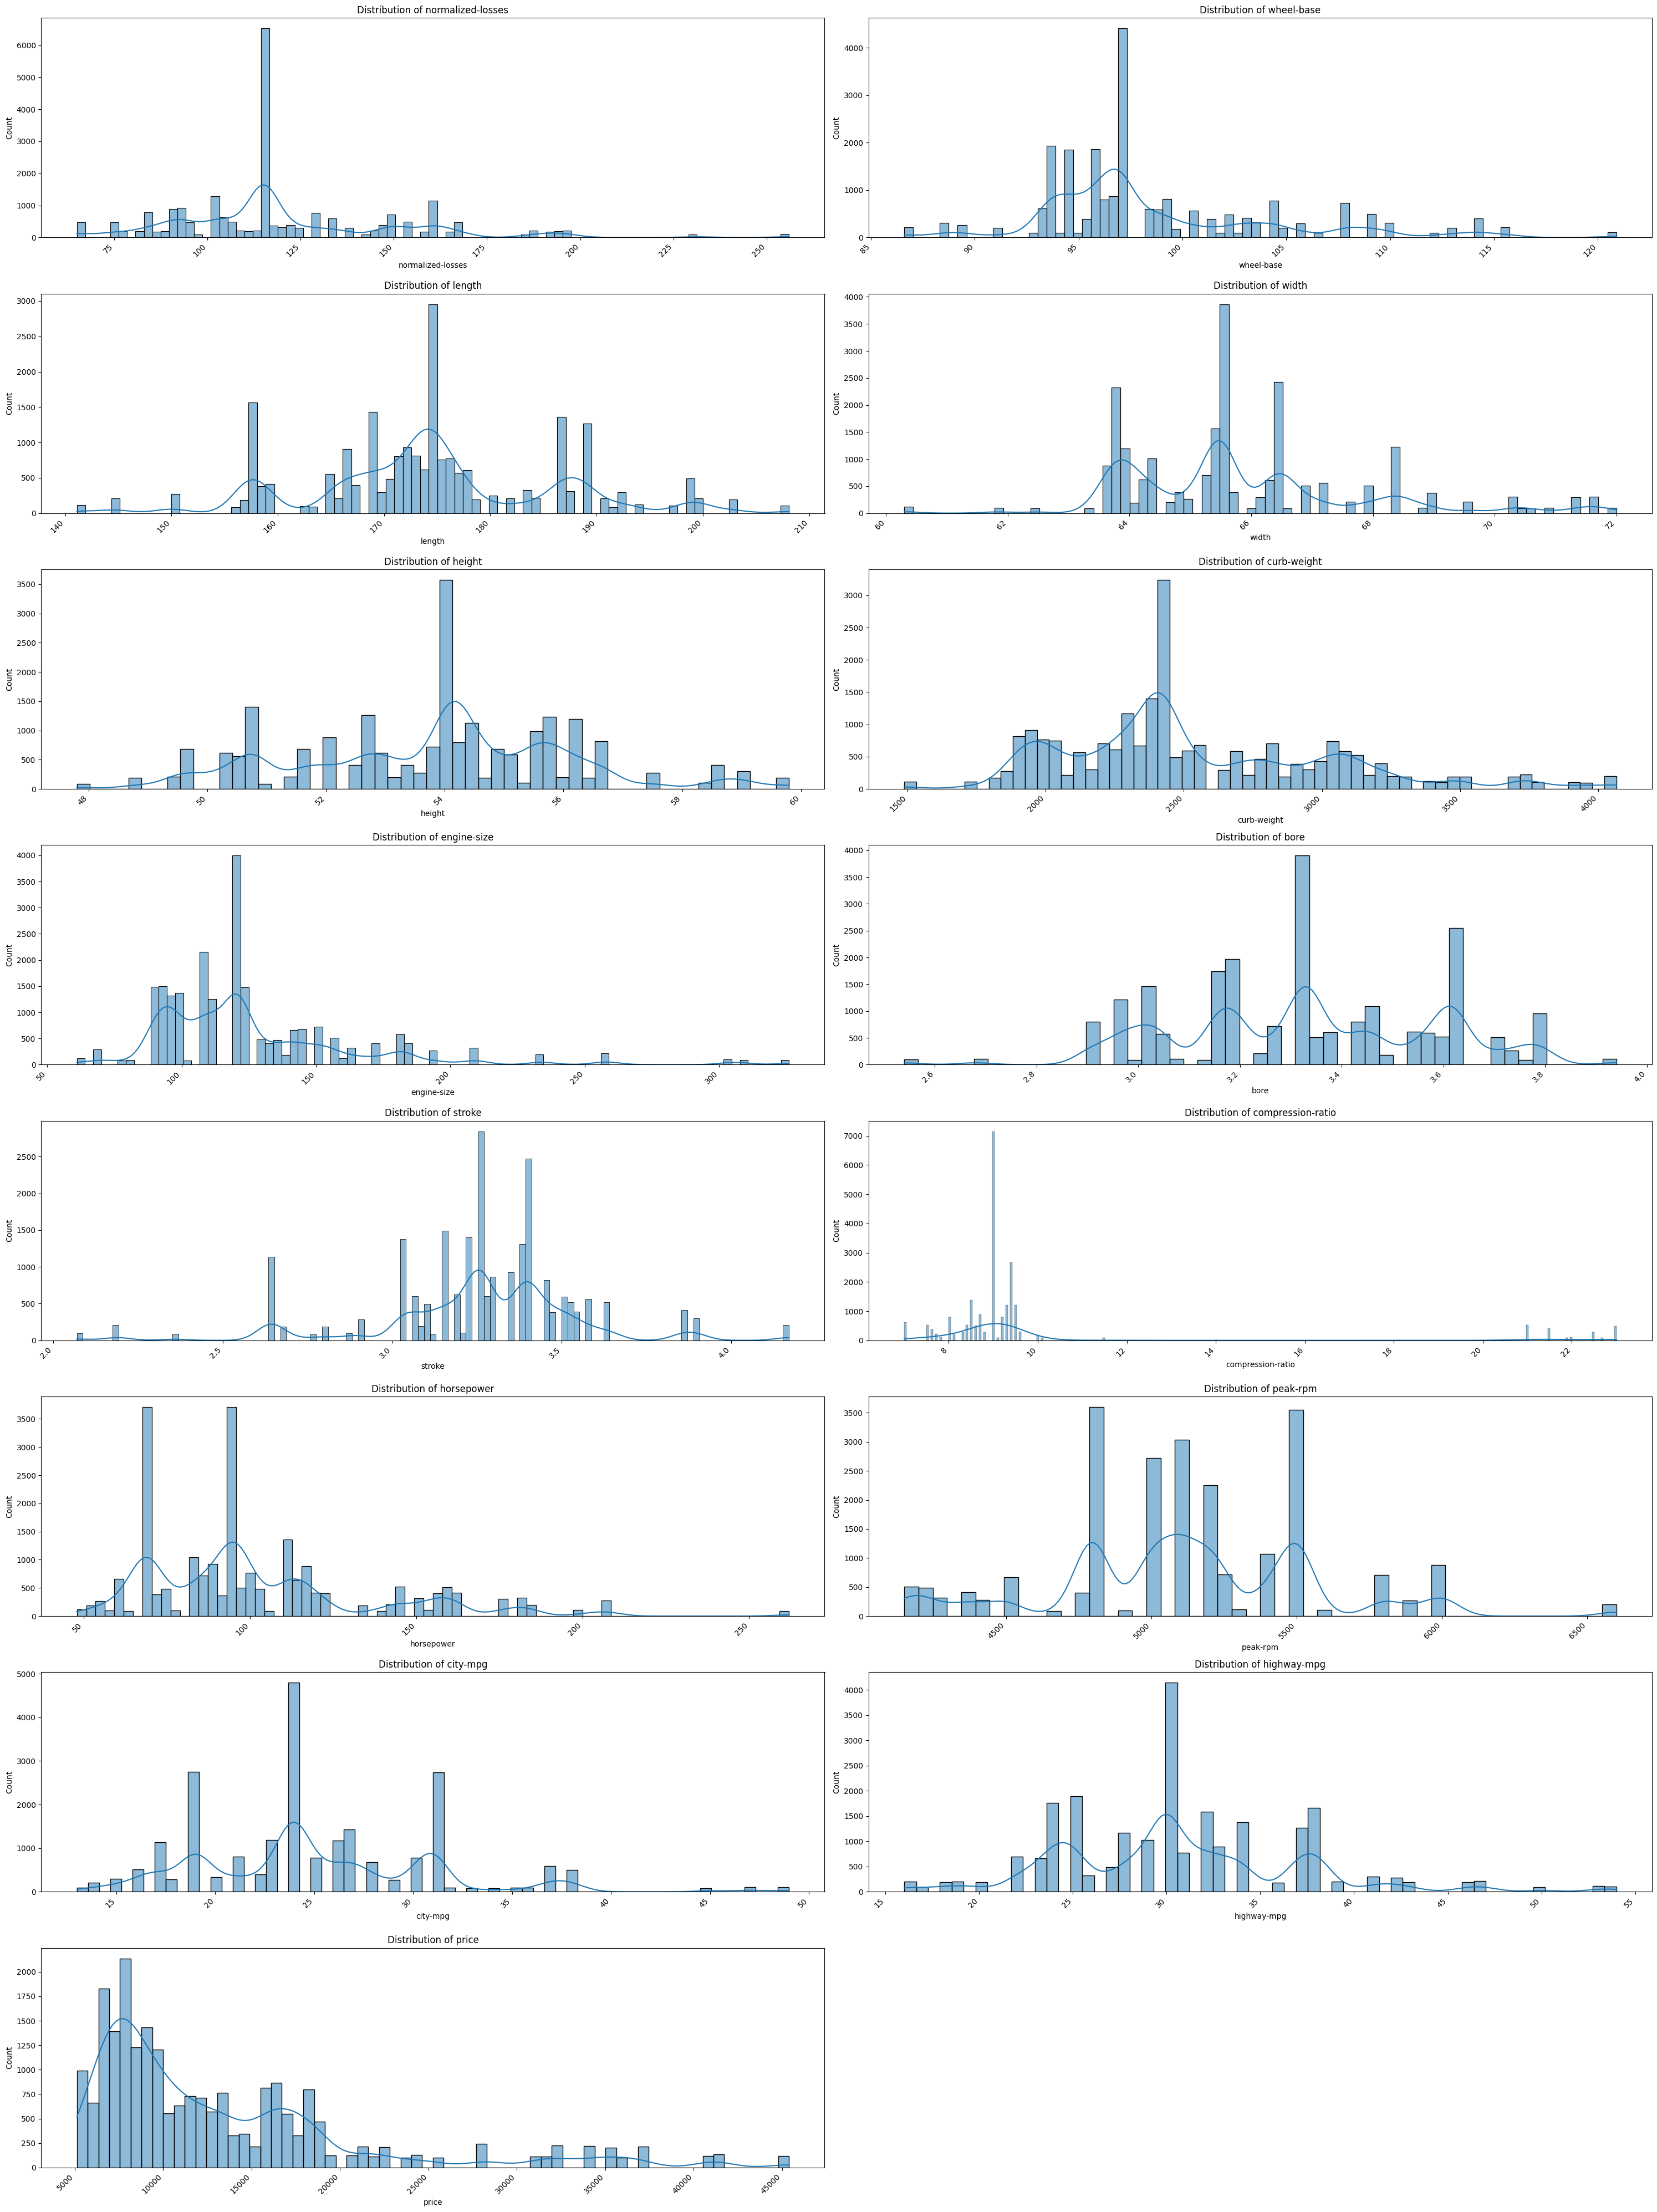

In [ ]:
# create histogram again to analyze distribution again after handle missing values.
n_cols = len(num_cols)
cols_per_row = 2
rows_needed = int(np.ceil(n_cols / cols_per_row))

plt.figure(figsize=(15 * cols_per_row, 5 * rows_needed))

for index, col in enumerate(num_cols):
    plt.subplot(rows_needed, cols_per_row, index + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

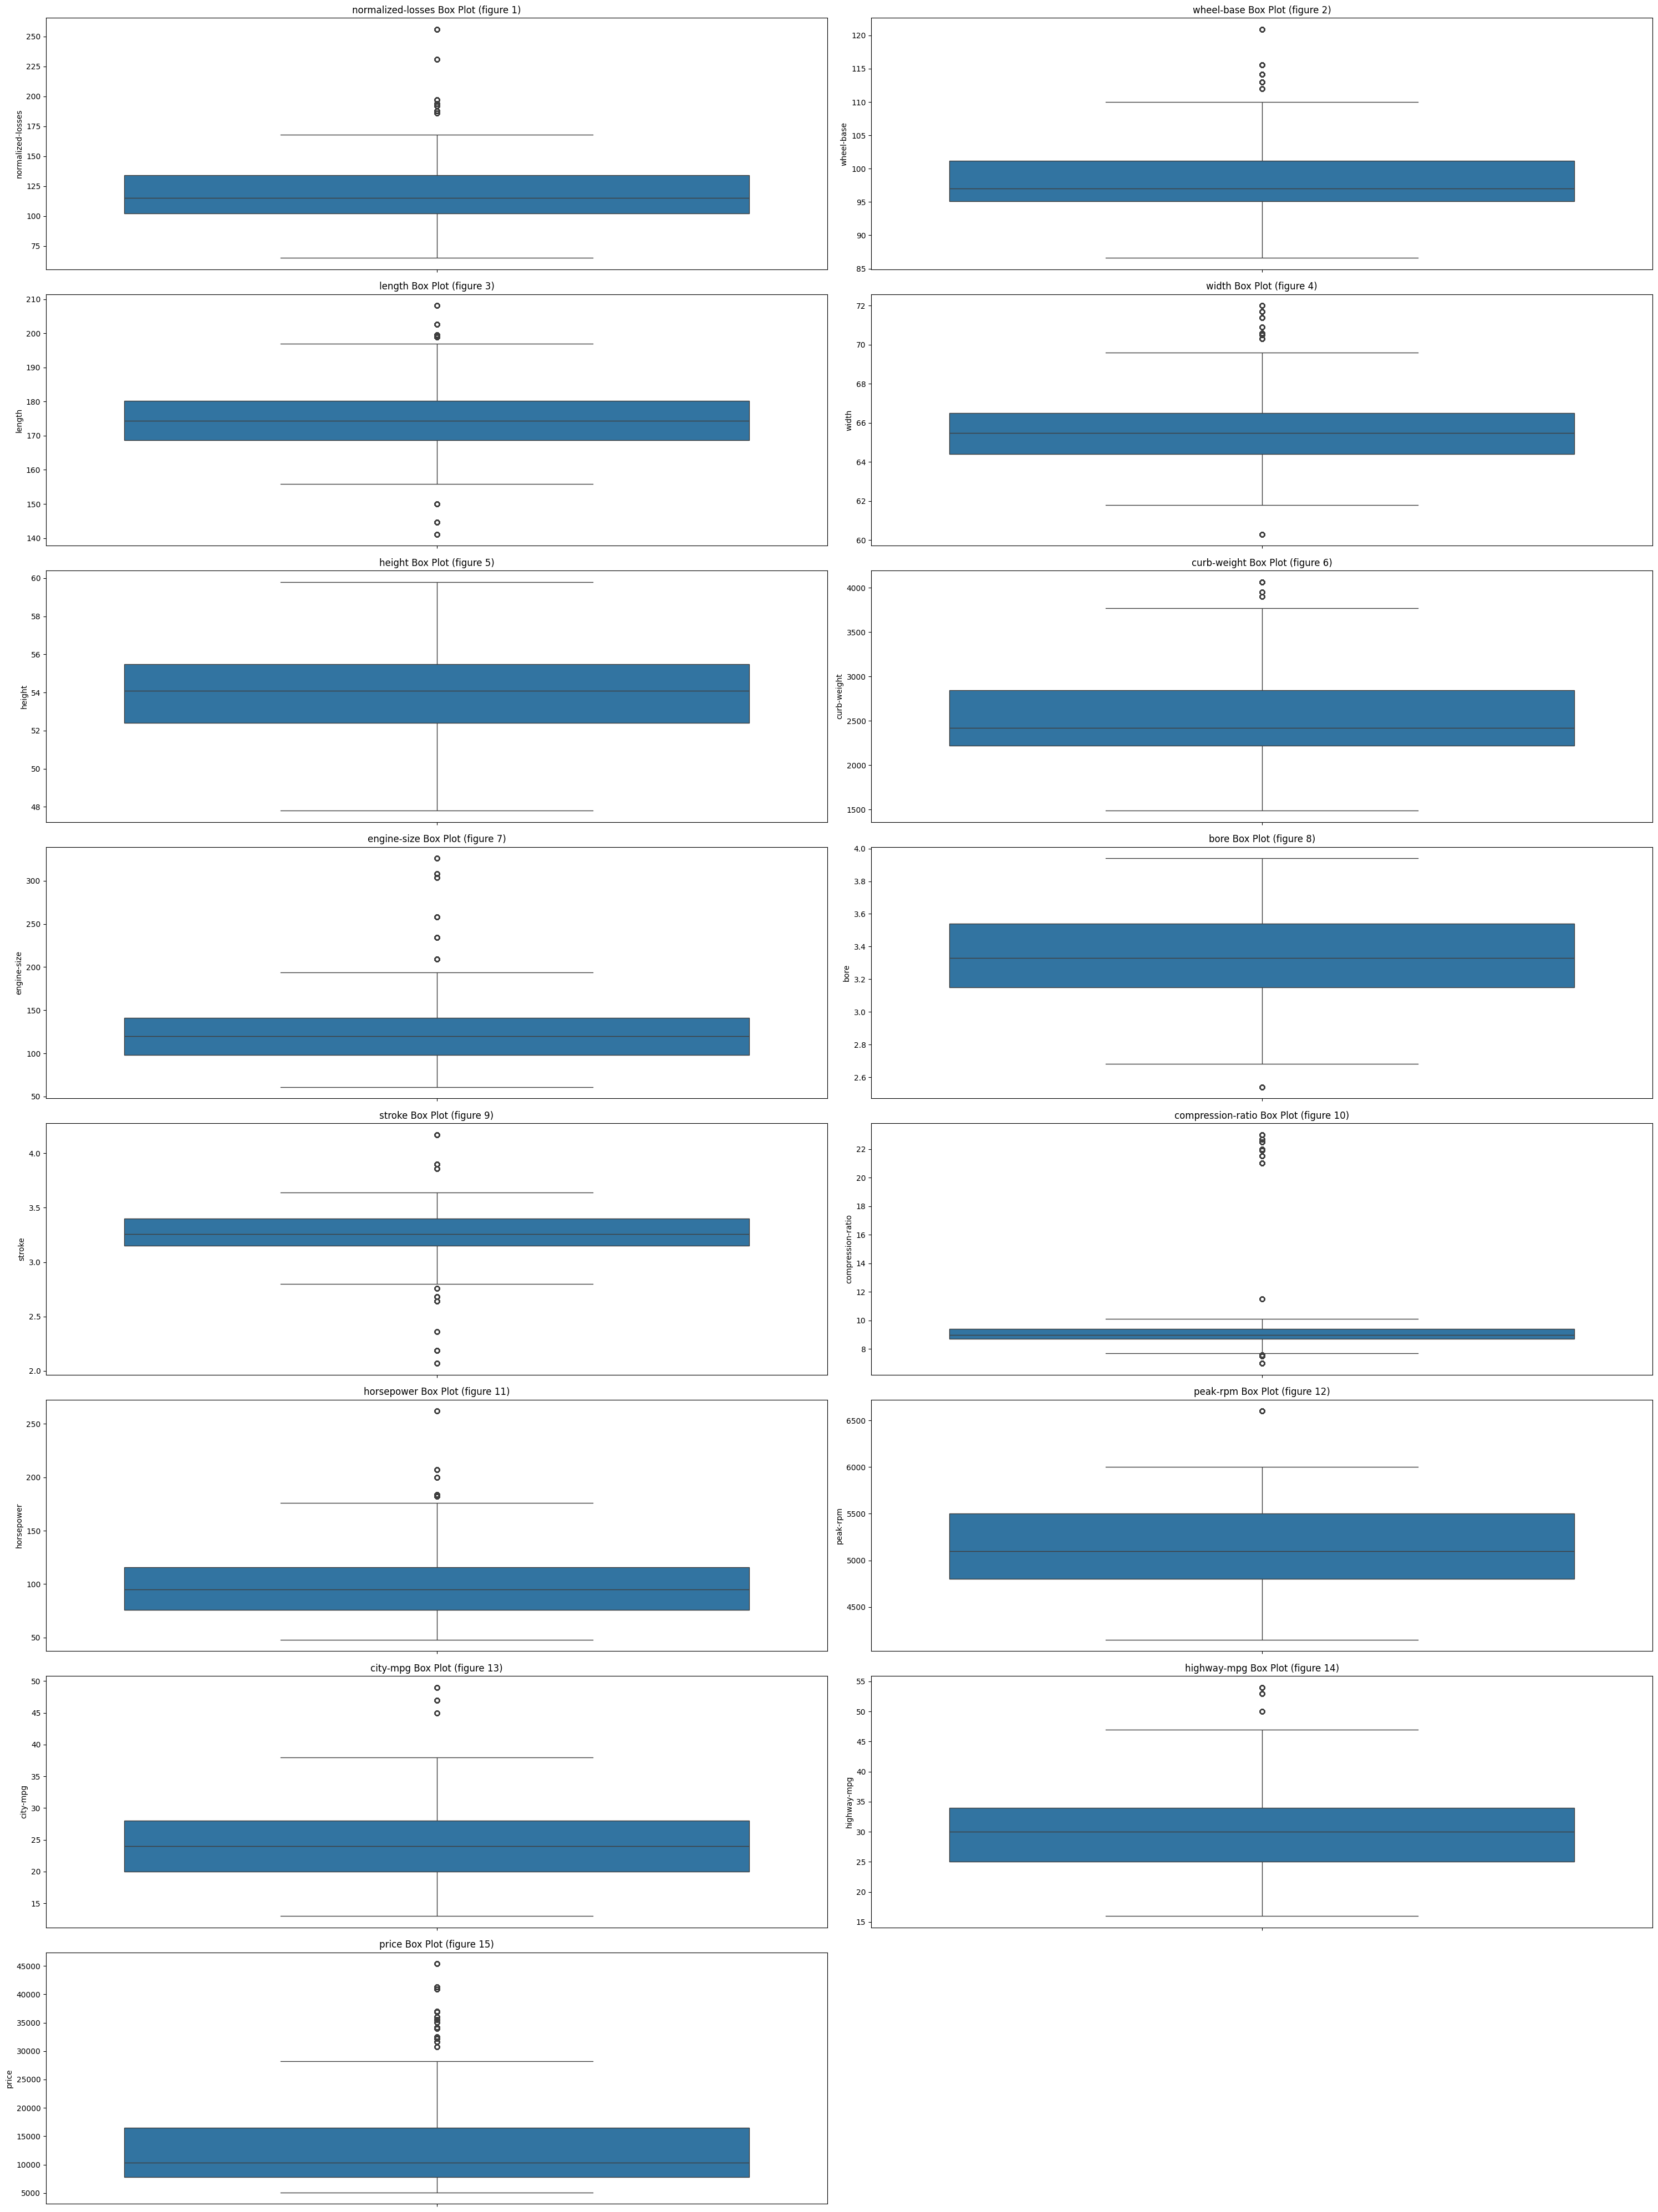

In [ ]:
# Create box plot to analyze outliers and distribution in each cols.
n_cols = len(num_cols)
cols_per_row = 2
rows_needed = int(np.ceil(n_cols / cols_per_row))

plt.figure(figsize=(15 * cols_per_row, 5 * rows_needed))

for index, col in enumerate(num_cols):
  plt.subplot(rows_needed, cols_per_row, index + 1)
  sns.boxplot(df[col])
  plt.title(f'{col} Box Plot (figure {index+1})')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

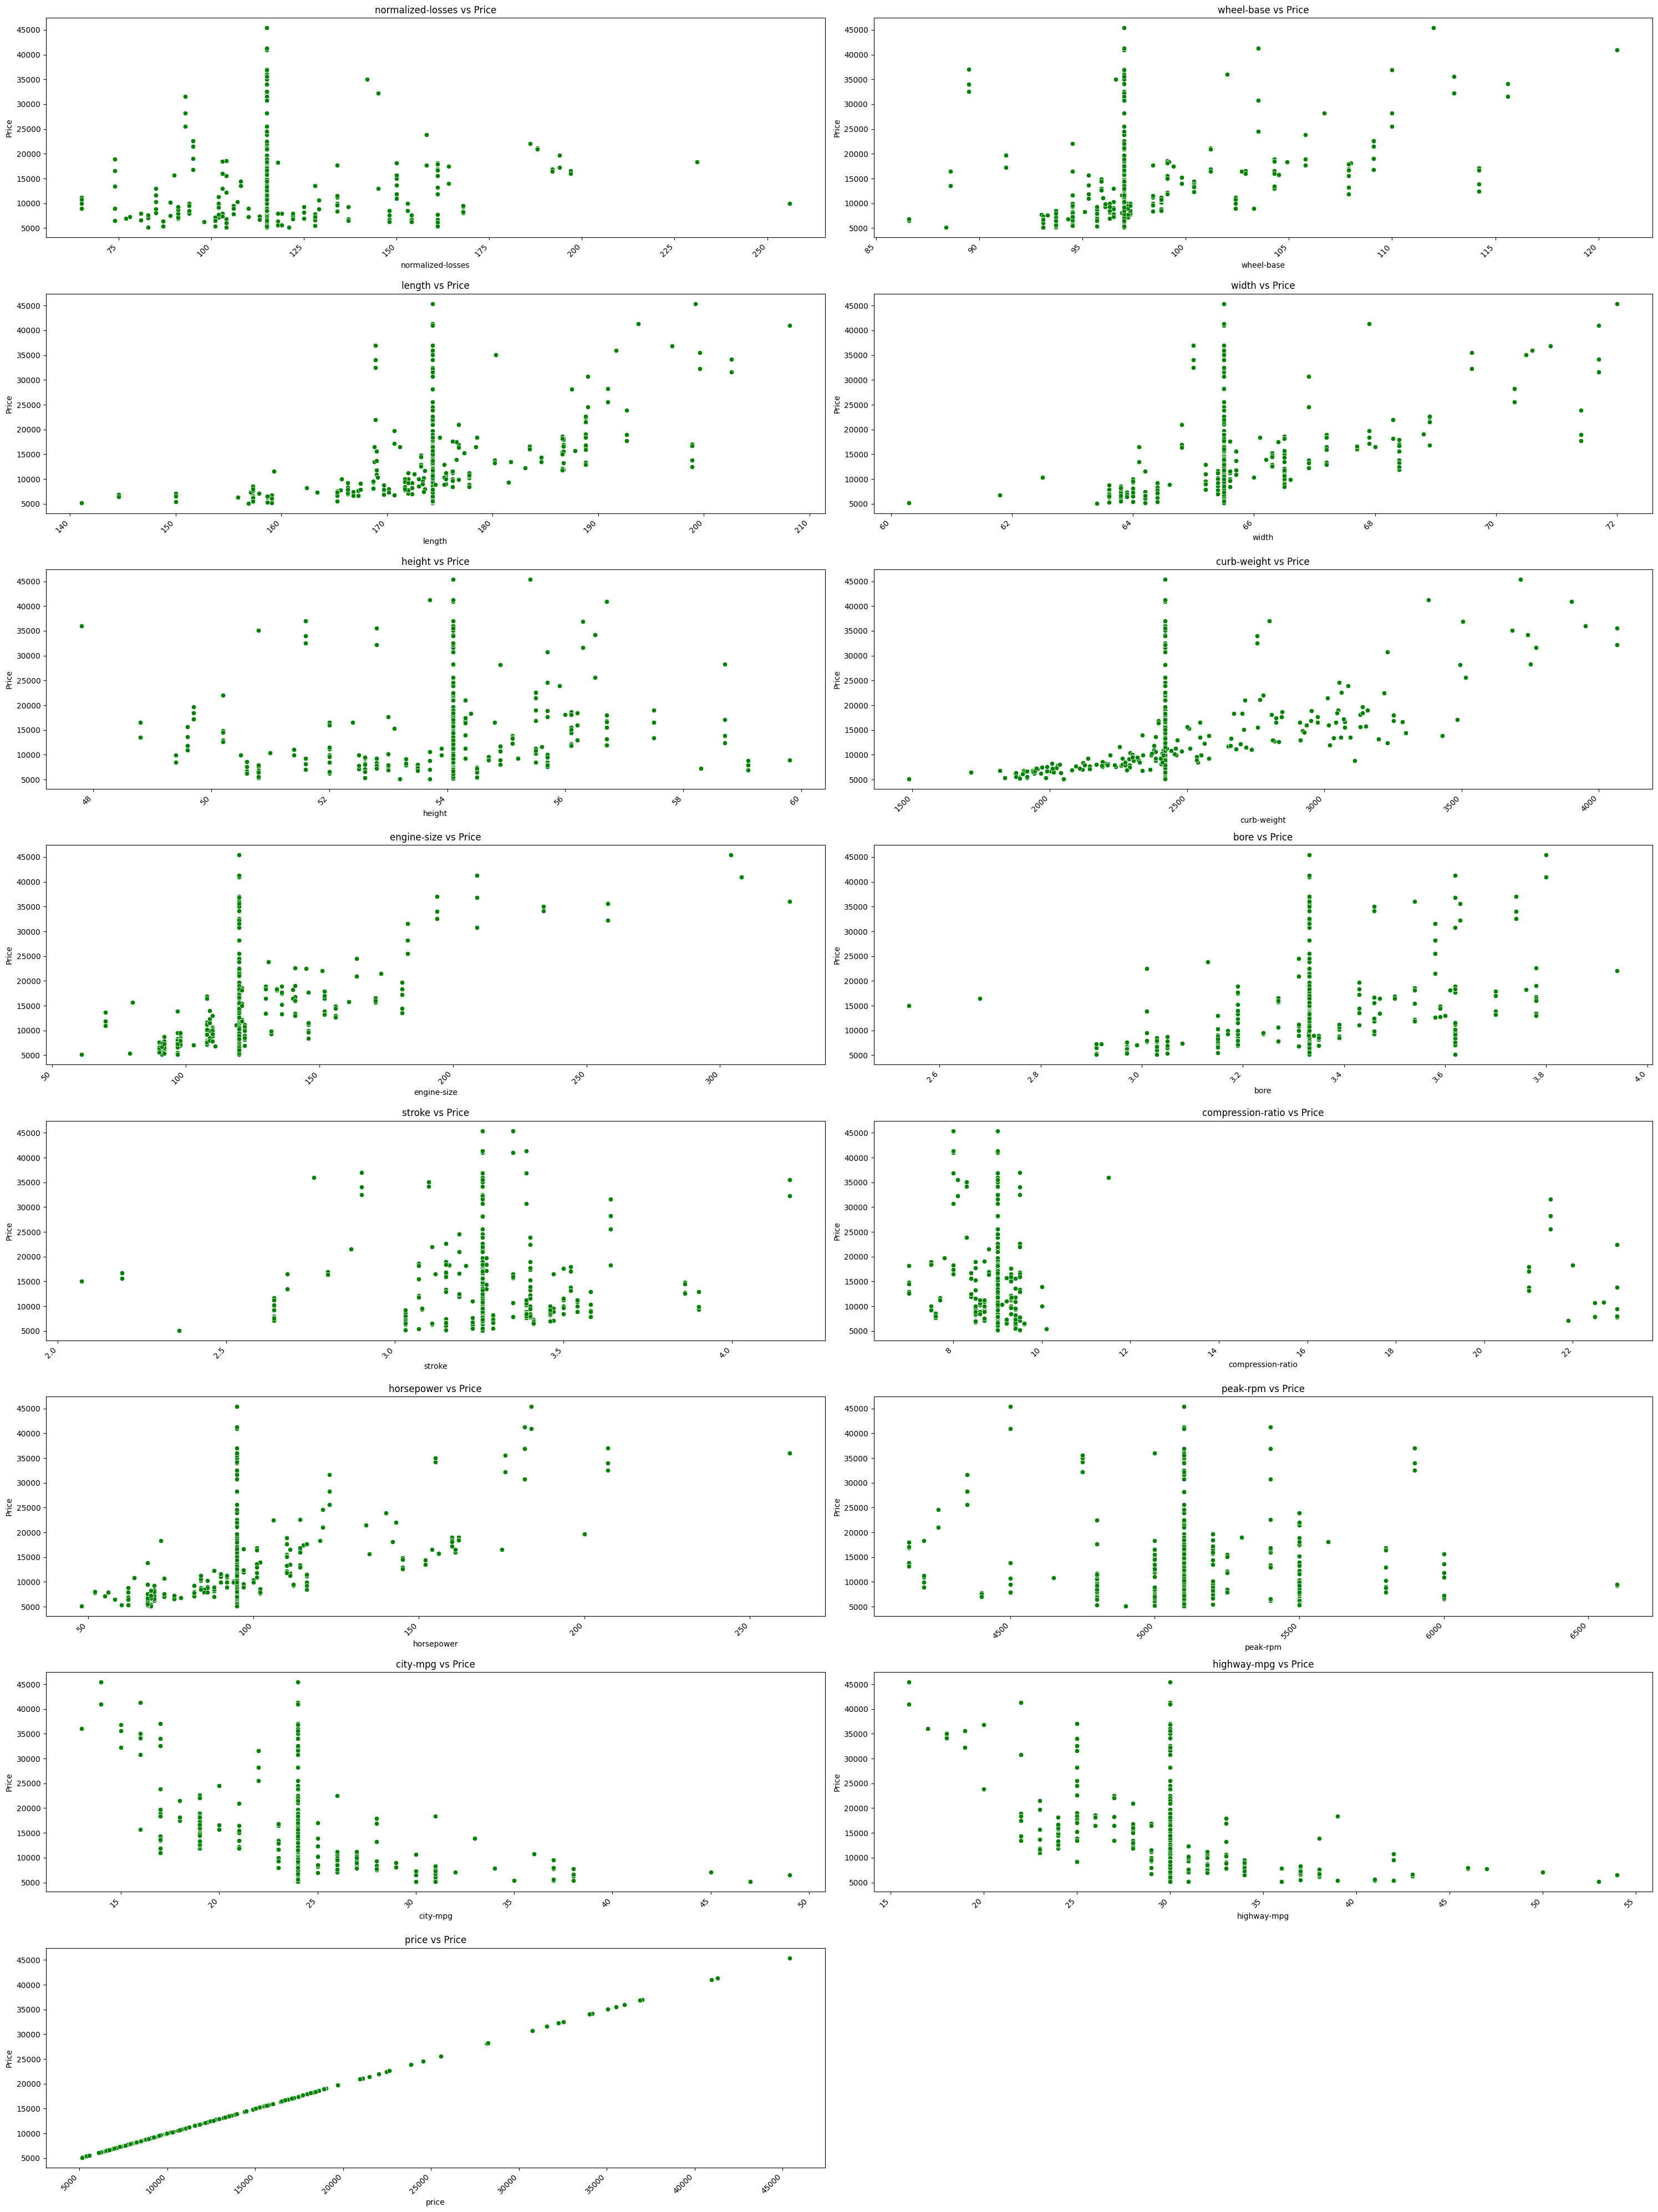

In [ ]:
# create a scatter plots to identify relation between dependent and independent variables.
n_cols = len(num_cols)
cols_per_row = 2
rows_needed = int(np.ceil(n_cols / cols_per_row))

plt.figure(figsize=(15 * cols_per_row, 5 * rows_needed))

for index, col in enumerate(num_cols):
  plt.subplot(rows_needed, cols_per_row, index + 1)
  sns.scatterplot(x=df[col], y=df["price"], color="g")
  plt.title(f'{col} vs Price')
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

plt.show()

In the above charts, we can see that the cols "wheel base", "width", "length", "height", "curve weight", "bore", "engine-size", "hourse power" have a linear relation with price.

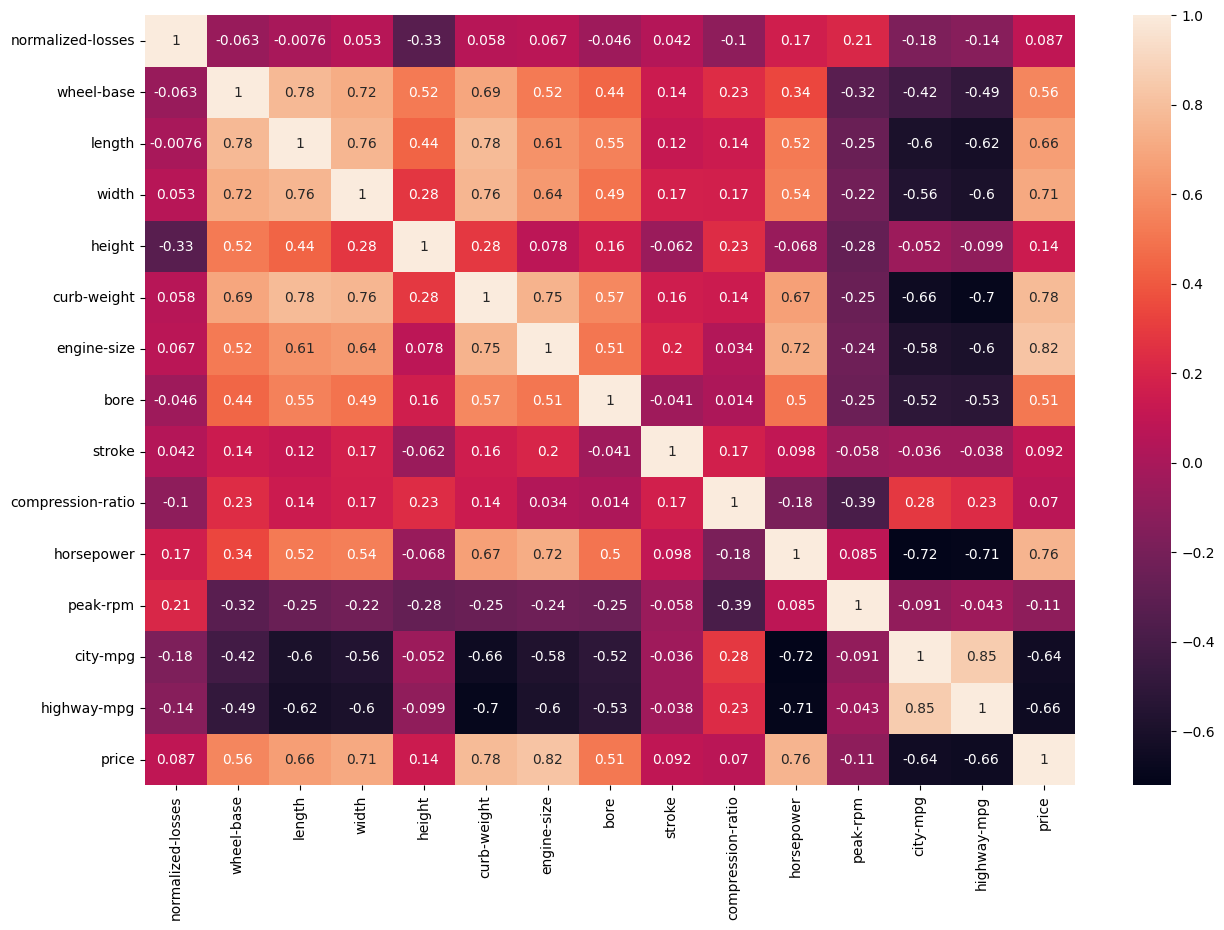

In [ ]:
# heatmap for alanyze correlation.
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
# Drop irrelevent numericals columns with respect to target variable

less_correlation_cols = ['height', 'compression-ratio', 'stroke', 'peak-rpm', 'normalized-losses']
df.drop(columns=less_correlation_cols, axis=1, inplace=True)

In [ ]:
# Fetch categorical columns

all_cols = df.columns.tolist()
cols_to_exclude  = num_cols

cat_cols = [col for col in all_cols if col not in cols_to_exclude]

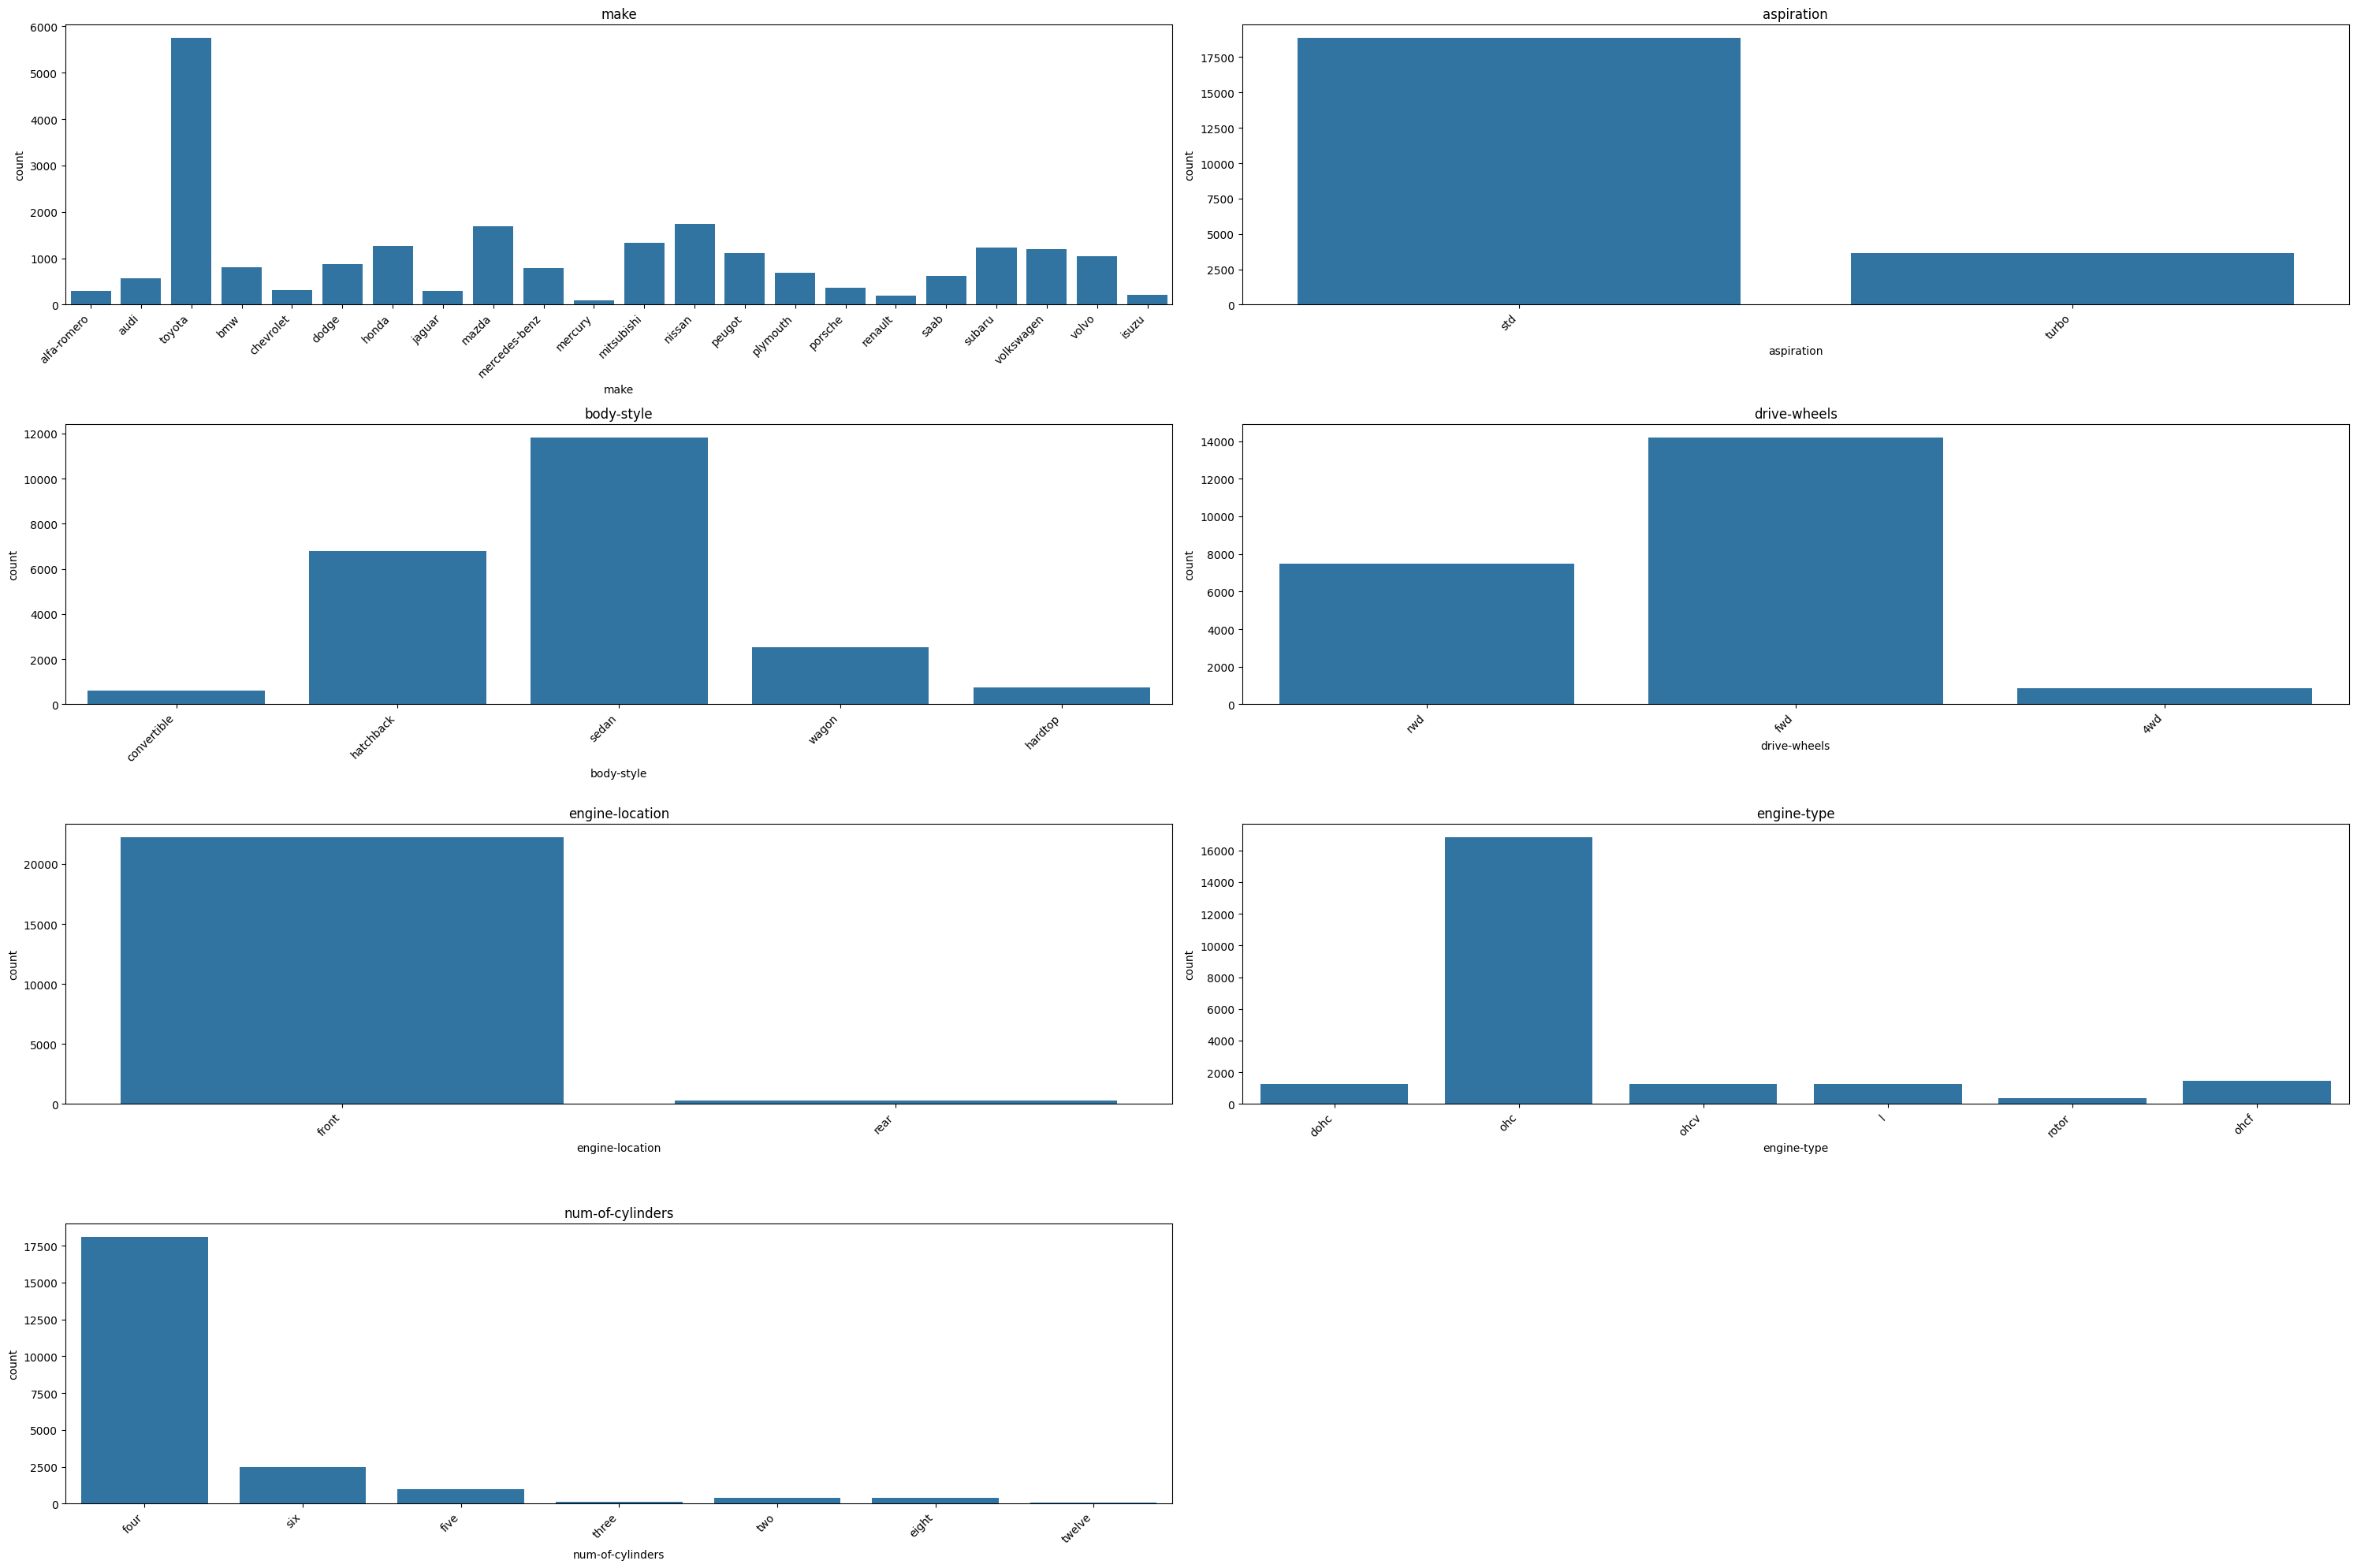

In [ ]:
# Plot count chart to analyze counts of each categorical cols and balancing .
n_cols = len(cat_cols)
cols_per_row = 2
rows_needed = int(np.ceil(n_cols / cols_per_row))

plt.figure(figsize=(15 * cols_per_row, 5 * rows_needed))

for index, col in enumerate(cat_cols):
  plt.subplot(rows_needed, cols_per_row, index + 1)
  sns.countplot(x=df[col])
  plt.title(col)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

plt.show()

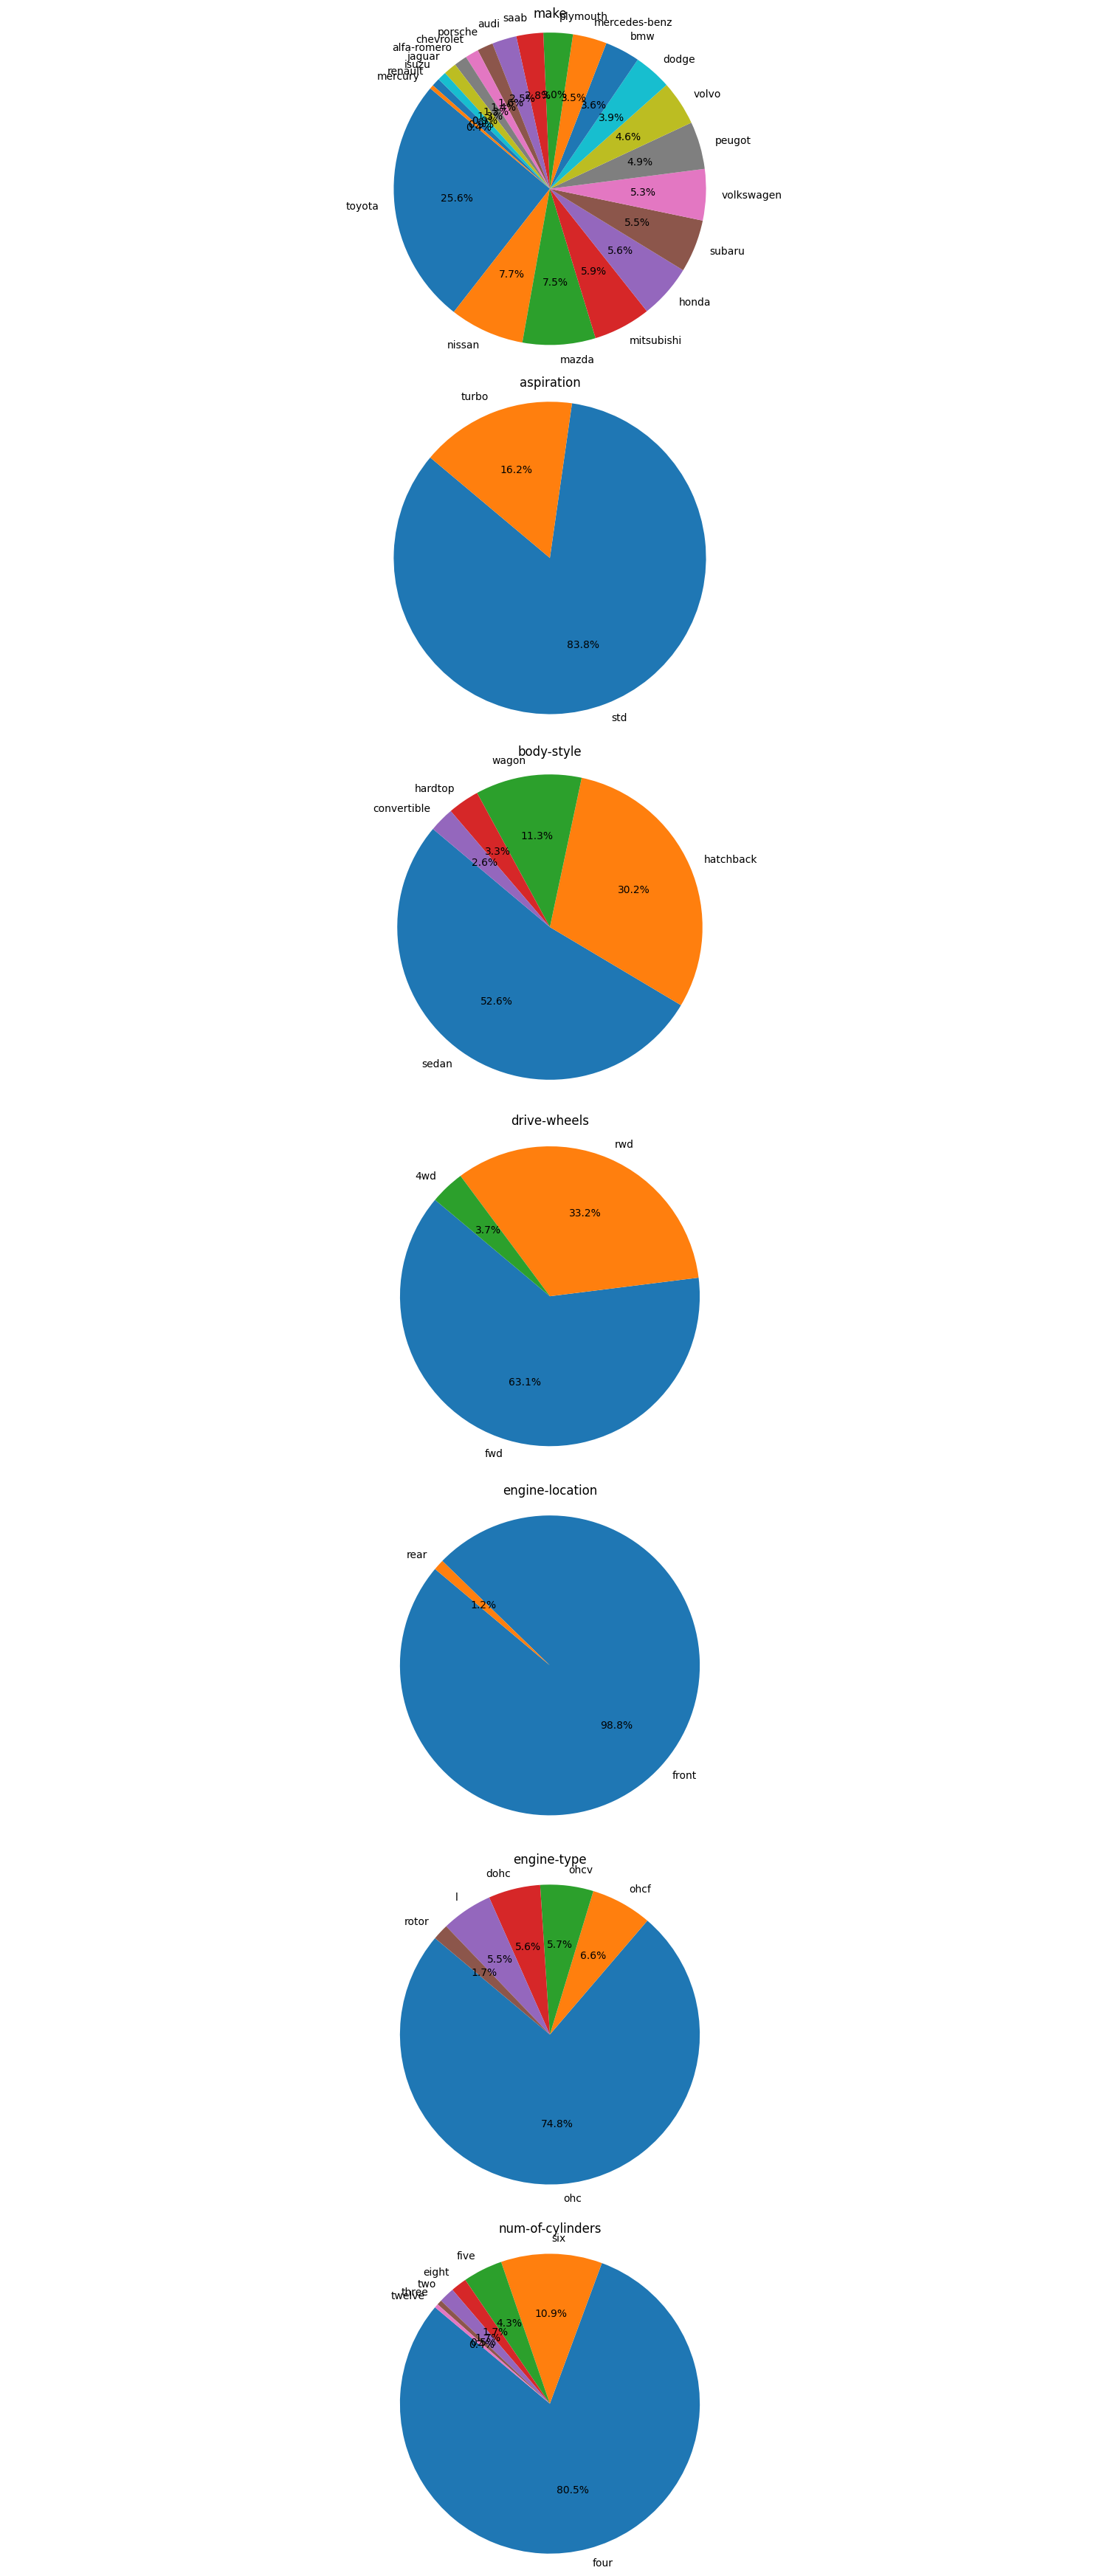

In [ ]:
# Pie chart to analyze categories in a cols.
n_cols = len(cat_cols)
cols_per_row = 1  # You can adjust this
rows_needed = int(np.ceil(n_cols / cols_per_row))

plt.figure(figsize=(15 * cols_per_row, 5 * rows_needed))  # Adjust figure size

for index, col in enumerate(cat_cols):
  plt.subplot(rows_needed, cols_per_row, index + 1)
  value_counts = df[col].value_counts()
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title(col)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.tight_layout()

plt.show()

## Exploring and Handling Outliers in Numerical Columns

This step involves identifying outliers within the numerical features of the dataset and applying appropriate strategies to handle them. Outliers are data points that deviate significantly from other observations and can potentially skew model training and evaluation.

In [ ]:
#Check for outliers using the IQR
def get_bounds(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  return lower_bound, upper_bound

In [ ]:
# print the outliers in cols
num_cols = separate_numerial_col_by_value_count(df.select_dtypes(exclude='O').columns)
for col in num_cols:
  lower_bound, upper_bound = get_bounds(df, col)

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(lower_bound)
  print(upper_bound)
  print(f"The {col} data has {len(outliers)} outliers")
  print(df[col].describe())
  print("----------------------------------------")

85.94999999999999
110.35000000000002
The wheel-base data has 1022 outliers
count    22479.000000
mean        98.641025
std          5.777071
min         86.600000
25%         95.100000
50%         97.000000
75%        101.200000
max        120.900000
Name: wheel-base, dtype: float64
----------------------------------------
151.45
197.45
The length data has 1610 outliers
count    22479.000000
mean       174.332106
std         11.634923
min        141.100000
25%        168.700000
50%        174.332106
75%        180.200000
max        208.100000
Name: length, dtype: float64
----------------------------------------
61.250000000000014
69.64999999999999
The width data has 1395 outliers
count    22479.000000
mean        65.853303
std          1.981338
min         60.300000
25%         64.400000
50%         65.500000
75%         66.500000
max         72.000000
Name: width, dtype: float64
----------------------------------------
1286.5
3778.5
The curb-weight data has 394 outliers
count    22479

In [ ]:
# def remove_outliers(num_col):
#   df_cleaned = df.copy()

#   for col in num_col:
#     lower_bound, upper_bound = get_bounds(df_cleaned, col)

#     # Keep only the rows within bounds
#     df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

#   return df_cleaned

In [ ]:
# remove_outliers_cols = ["length", "peak-rpm", ""]

# updated_df = remove_outliers(remove_outliers_cols)

In [ ]:
# Appling capping on outliers

def iqr_capping(updated_df, cols):
  for col in cols:
    lower_bound, upper_bound = get_bounds(updated_df, col)

    updated_df[col] = np.where(updated_df[col] < lower_bound, lower_bound, np.where(updated_df[col] > upper_bound, upper_bound, updated_df[col]))
  return None

In [ ]:
# capping_cols = [
#     "normalized-losses",
#     "wheel-base",
#     "width",
#     "curb-weight",
#     "engine-size",
#     "bore",
#     "horsepower",
#     "peak-rpm",
#     "city-mpg",
#     "highway-mpg",
#     "city-mpg"]
capping_cols = num_cols
iqr_capping(df, capping_cols)

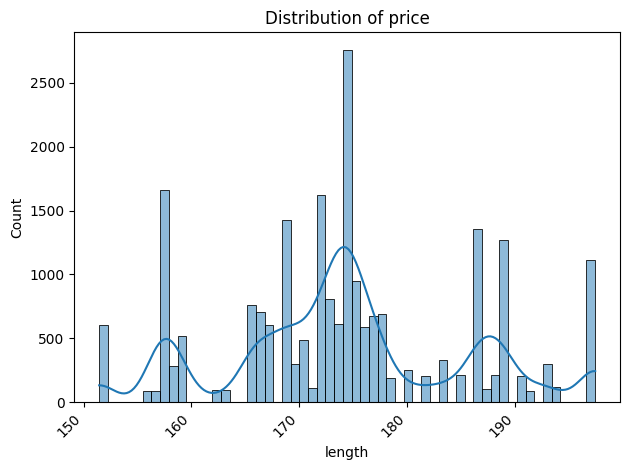

In [ ]:
# Validate no outlier left
sns.histplot(df["length"], kde=True)
plt.title(f"Distribution of {col}")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Encoding Categorical Data into Numerical Representation

This step involves converting the categorical features in our dataset into a numerical format that can be understood and processed by machine learning models. We employed either Label Encoding or One-Hot Encoding based on the nature of each categorical column.

**Actions Performed:**

1.  **Identify Categorical Columns for Encoding:**
    * We selected the remaining categorical columns in the DataFrame (after potentially dropping some non-impacting ones in a previous step). These columns typically have a data type of `object`.


2.  **Apply Encoding Techniques:**
    * **Label Encoding:** This technique was applied to binary categorical features (those with only two unique categories). Label Encoding assigns a numerical label (e.g., 0 and 1) to each category.

    * **One-Hot Encoding:** This technique was applied to multi-category nominal features (those with more than two unique categories and no inherent order). One-Hot Encoding creates new binary columns for each unique category in the original column.

**Verification:**

After applying the encoding techniques, the DataFrame was inspected to:

* Confirm that the original categorical columns have been replaced by numerical representations (either single binary columns from Label Encoding or multiple binary columns from One-Hot Encoding).
* Check the data types of the newly created columns (they should be numerical, typically `int64`).
* Ensure that the number of columns has increased as expected due to One-Hot Encoding.

In [ ]:
for col in df.select_dtypes(include='O').columns:
  print(col)
  print(df[col].unique())
  print("=====================")

make
['alfa-romero' 'audi' 'toyota' 'bmw' 'chevrolet' 'dodge' 'honda' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'volkswagen' 'volvo'
 'isuzu']
aspiration
['std' 'turbo']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
engine-type
['dohc' 'ohc' 'ohcv' 'l' 'rotor' 'ohcf']
num-of-cylinders
['four' 'six' 'five' 'three' 'two' 'eight' 'twelve']


In [ ]:
# encode categorical cols, apply label when col has 2 categories else one hot.
def encode_columns(updated_df):
  label_encoder = LabelEncoder()
  cols_to_one_hot = []
  for col in updated_df.select_dtypes(include='O').columns:
    if len(updated_df[col].unique()) == 2:
      updated_df[col] = label_encoder.fit_transform(updated_df[col])
      updated_df[col] = updated_df[col].astype('int16')

    else:
       cols_to_one_hot.append(col)
  print(cols_to_one_hot)
  updated_df = pd.get_dummies(updated_df, columns=cols_to_one_hot, dtype=int, drop_first=True)
  return updated_df

In [ ]:
updated_df = encode_columns(df)

['make', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders']


In [ ]:
updated_df.columns

Index(['aspiration', 'engine-location', 'wheel-base', 'length', 'width',
       'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg',
       'highway-mpg', 'price', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'num-of-cylinders_two'],
      dtype='object')

In [ ]:
updated_df.shape

(22479, 50)

In [ ]:
updated_df.head(5)

aspiration  engine-location  wheel-base      length  width  curb-weight  \
0           0                0        88.6  168.800000   64.1       2548.0   
1           0                0        88.6  168.800000   64.1       2548.0   
2           0                0        94.5  171.200000   65.5       2823.0   
3           0                0        99.8  176.600000   66.2       2337.0   
4           0                0        99.4  174.332106   65.5       2824.0   

   engine-size      bore  horsepower  city-mpg  highway-mpg    price  \
0        120.0  3.470000       111.0      21.0         27.0  13495.0   
1        130.0  3.470000       111.0      21.0         27.0  16500.0   
2        152.0  3.331389       154.0      19.0         26.0  16500.0   
3        109.0  3.190000       102.0      24.0         30.0  13950.0   
4        136.0  3.331389       115.0      18.0         22.0  17450.0   

   make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  \
0          0         0               0           0           0           0   
1          0         0               0           0           0           0   
2          0         0               0           0           0           0   
3          1         0               0           0           0           0   
4          1         0               0           0           0           0   

   make_jaguar  make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  \
0            0           0                   0             0                0   
1            0           0                   0             0                0   
2            0           0                   0             0                0   
3            0           0                   0             0                0   
4            0           0                   0             0                0   

   make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  \
0            0            0              0             0             0   
1            0            0              0             0             0   
2            0            0              0             0             0   
3            0            0              0             0             0   
4            0            0              0             0             0   

   make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  \
0          0            0            0                0           0   
1          0            0            0                0           0   
2          0            0            0                0           0   
3          0            0            0                0           0   
4          0            0            0                0           0   

   body-style_hardtop  body-style_hatchback  body-style_sedan  \
0                   0                     0                 0   
1                   0                     0                 0   
2                   0                     1                 0   
3                   0                     0                 1   
4                   0                     0                 1   

   body-style_wagon  drive-wheels_fwd  drive-wheels_rwd  engine-type_l  \
0                 0                 0                 1              0   
1                 0                 0                 1              0   
2                 0                 0                 1              0   
3                 0                 1                 0              0   
4                 0                 0                 0              0   

   engine-type_ohc  engine-type_ohcf  engine-type_ohcv  engine-type_rotor  \
0                0                 0                 0                  0   
1                1                 0                 0                  0   
2                0                 0                 1                  0   
3                1                 0                 0                  0   
4                1                 0                

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22479 entries, 0 to 30329
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   aspiration               22479 non-null  int16  
 1   engine-location          22479 non-null  int16  
 2   wheel-base               22479 non-null  float64
 3   length                   22479 non-null  float64
 4   width                    22479 non-null  float64
 5   curb-weight              22479 non-null  float64
 6   engine-size              22479 non-null  float64
 7   bore                     22479 non-null  float64
 8   horsepower               22479 non-null  float64
 9   city-mpg                 22479 non-null  float64
 10  highway-mpg              22479 non-null  float64
 11  price                    22479 non-null  float64
 12  make_audi                22479 non-null  int64  
 13  make_bmw                 22479 non-null  int64  
 14  make_chevrolet           22

## Training, Testing, and Validating the Linear Regression Model

This step involves building, training, evaluating, and validating a Linear Regression model to predict car prices using the preprocessed numerical features.

**Actions Performed:**

1.  **Data Splitting:**
    * The dataset was split into training and testing sets using `train_test_split` from `sklearn.model_selection`. A typical split ratio of 80% for training and 20% for testing was used. A `random_state` was set for reproducibility.

2.  **Model Instantiation:**
    * A Linear Regression model was instantiated using `LinearRegression` from `sklearn.linear_model`.


3.  **Model Training:**
    * The instantiated Linear Regression model was trained on the training data (`X_train`, `y_train`) using the `.fit()` method.


4.  **Model Evaluation on Test Set:**
    * The trained model was used to make predictions on the unseen test data (`X_test`) using the `.predict()` method.
    * The performance of the model was evaluated using appropriate regression metrics such as:
        * **Mean Squared Error (MSE):** Measures the average squared difference between the predicted and actual values.
        * **R-squared (R2 Score):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

**Insights:**

The evaluation metrics on the test set provide an indication of how well the Linear Regression model generalizes to unseen data. The cross-validation results offer a more stable estimate of the model's performance on the training data and can help in detecting potential overfitting or underfitting. These results serve as a baseline for comparison with other more complex models.

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# I have selected relevent features for linear model, they are highly correalted with price
X = updated_df[['aspiration',
               'engine-location',
               'wheel-base',
               'length',
               'width',
               'curb-weight',
               'engine-size',
               'bore',
               'horsepower',
               'city-mpg',
               'highway-mpg'
              ]]
y = updated_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
X_train.head()

aspiration  engine-location  wheel-base      length  width  \
29396           0                0        96.5  174.332106   65.2   
20316           0                0        93.7  174.332106   63.4   
22965           0                0       102.9  183.500000   67.7   
653             1                0        96.9  173.600000   65.5   
13657           0                0        97.0  174.332106   66.5   

       curb-weight  engine-size  bore  horsepower  city-mpg  highway-mpg  
29396       2289.0        110.0  3.15        86.0      27.0         33.0  
20316       2050.0         97.0  3.62        69.0      31.0         36.0  
22965       2976.0        120.0  3.27       161.0      20.0         24.0  
653         2650.0        108.0  3.62        95.0      23.0         23.0  
13657       2420.0        121.0  3.54       110.0      21.0         28.0

In [ ]:
y_train.head()

29396     9095.0
20316     5118.0
22965    16558.0
653      11694.0
13657    12170.0
Name: price, dtype: float64

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# print params that define the increase of value and impact on price
lr.params

const             -51503.531105
aspiration           -46.742851
engine-location    11741.613519
wheel-base           116.438330
length                14.762585
width                600.485482
curb-weight            3.344999
engine-size           53.288184
bore               -1518.119209
horsepower            36.884642
city-mpg             -71.217036
highway-mpg          -46.017018
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     7190.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:28:48   Log-Likelihood:            -1.6864e+05
No. Observations:               17983   AIC:                         3.373e+05
Df Residuals:                   17971   BIC:                         3.374e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -5.15e+04   1270.024    -

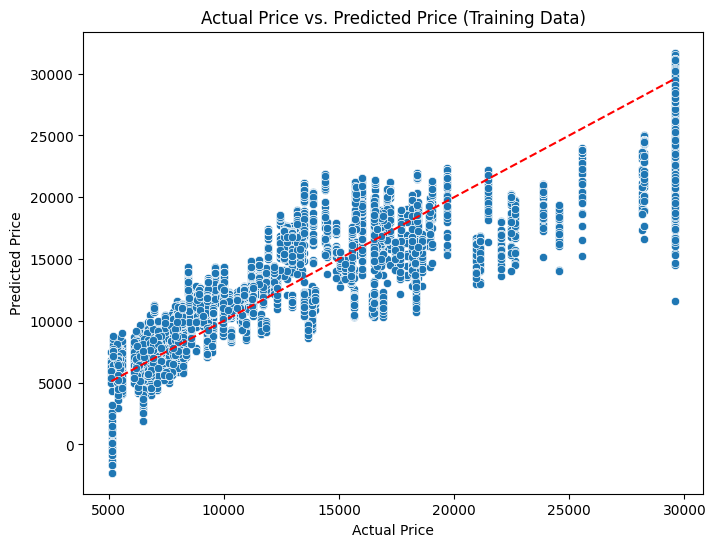

In [ ]:
y_pred_train = lr.predict(X_train_sm)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price (Training Data)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

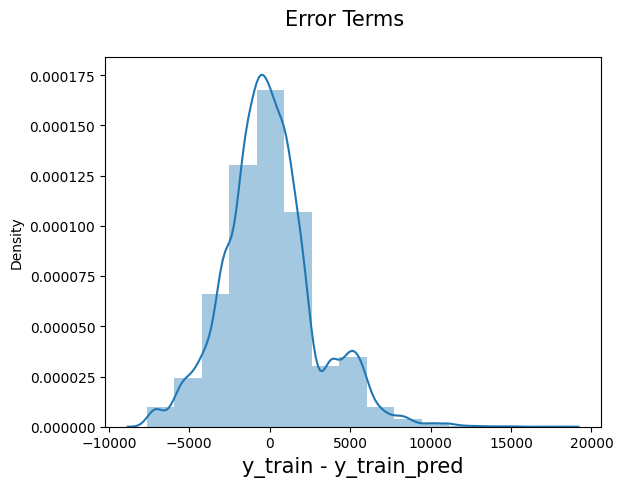

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
res = (y_train - y_train_pred)

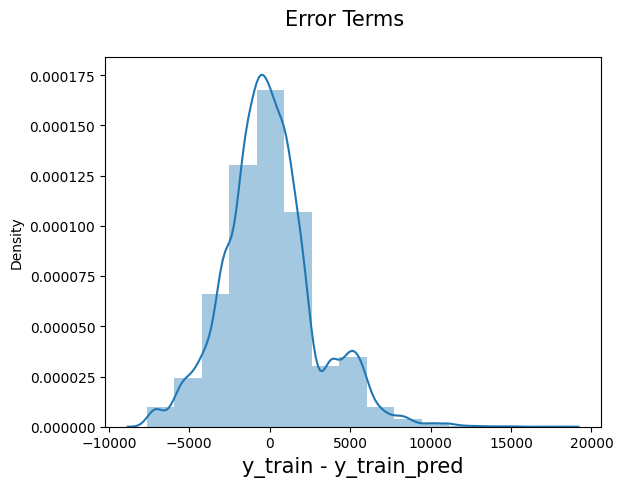

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
y_pred.head()

25853    10499.863217
6999      6014.729970
11459    11962.282038
21683    10653.454713
15862    11967.336417
dtype: float64

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2848.4535859150224)

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8152426836000713

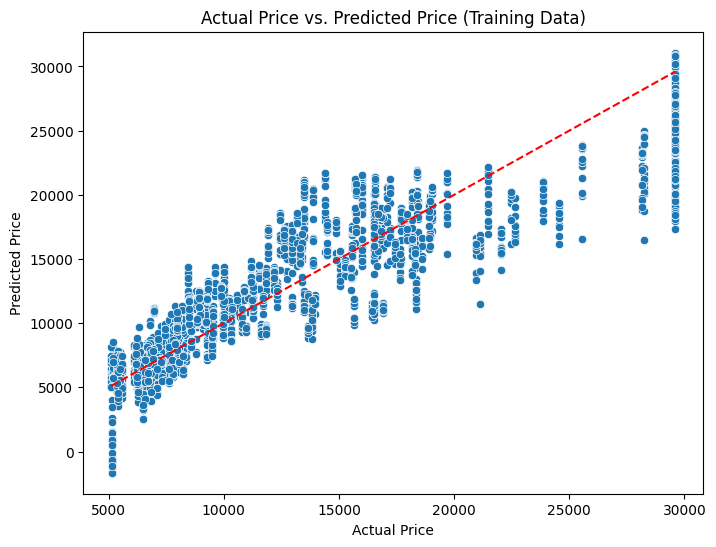

In [ ]:
y_pred_test = lr.predict(X_test_sm)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price (Training Data)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Training the Decision Tree Regression Model

This step involves building, training, and evaluating a Decision Tree Regression model for predicting car prices. Decision Trees can capture non-linear relationships in the data and might perform differently compared to Linear Regression.

**Actions Performed:**

1.  **Model Instantiation:**
    * A Decision Tree Regression model was instantiated using `DecisionTreeRegressor` from `sklearn.tree`. We started with default hyperparameters, but these can be tuned later for better performance.

2.  **Model Training:**
    * The instantiated Decision Tree Regression model was trained on the training data (`X_train`, `y_train`) using the `.fit()` method.

3.  **Model Evaluation on Test Set:**
    * The trained Decision Tree model was used to make predictions on the unseen test data (`X_test`) using the `.predict()` method.
    * The performance of the model was evaluated using the same regression metrics as Linear Regression: Mean Squared Error (MSE) and R-squared (R2 Score).

4.  **Visualization of the Decision Tree:**
    * For a better understanding of how the Decision Tree makes predictions, the trained tree can be visualized, especially for trees with a reasonable depth.


**Insights:**

The performance metrics of the Decision Tree model on the test set were compared to those of the Linear Regression model. Decision Trees often have the potential to outperform linear models when the underlying relationships in the data are non-linear. However, they are also prone to overfitting, especially if the tree is allowed to grow very deep. The cross-validation results help in assessing the model's generalization capability. Visualizing the tree provides insights into the decision rules learned by the model. The next step would typically involve tuning the hyperparameters of the Decision Tree (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`) to optimize its performance and prevent overfitting.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

In [ ]:
data_train, data_test = train_test_split(updated_df, test_size=0.20, random_state = 42)

In [ ]:
# Building a  regression model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
#Decision Tree Regressors in sklearn require input features in a 2D array.
x_train = data_train[['aspiration',
               'engine-location',
               'wheel-base',
               'length',
               'width',
               'curb-weight',
               'engine-size',
               'bore',
               'horsepower',
               'city-mpg',
               'highway-mpg'
              ]]# if training on 2 or more columns
y_train = np.array(data_train["price"]) #1D
model.fit(x_train,y_train) #learns from training data

#test how well it works ?? test data

DecisionTreeRegressor()

In [ ]:
r_sq = model.score(x_train, y_train)
print(f"R2: {r_sq}")

R2: 0.9980721619042469


In [ ]:
mean_squared_error(y_train, model.predict(x_train))

85143.7959563391

In [ ]:
x_test = data_test[['aspiration',
               'engine-location',
               'wheel-base',
               'length',
               'width',
               'curb-weight',
               'engine-size',
               'bore',
               'horsepower',
               'city-mpg',
               'highway-mpg'
              ]]# if training on 2 or more columns
y_test = np.array(data_test["price"]) #1D

mean_squared_error(y_test, model.predict(x_test)) #mean_squared_error(Y_true,Y_pred)

453805.25256258575

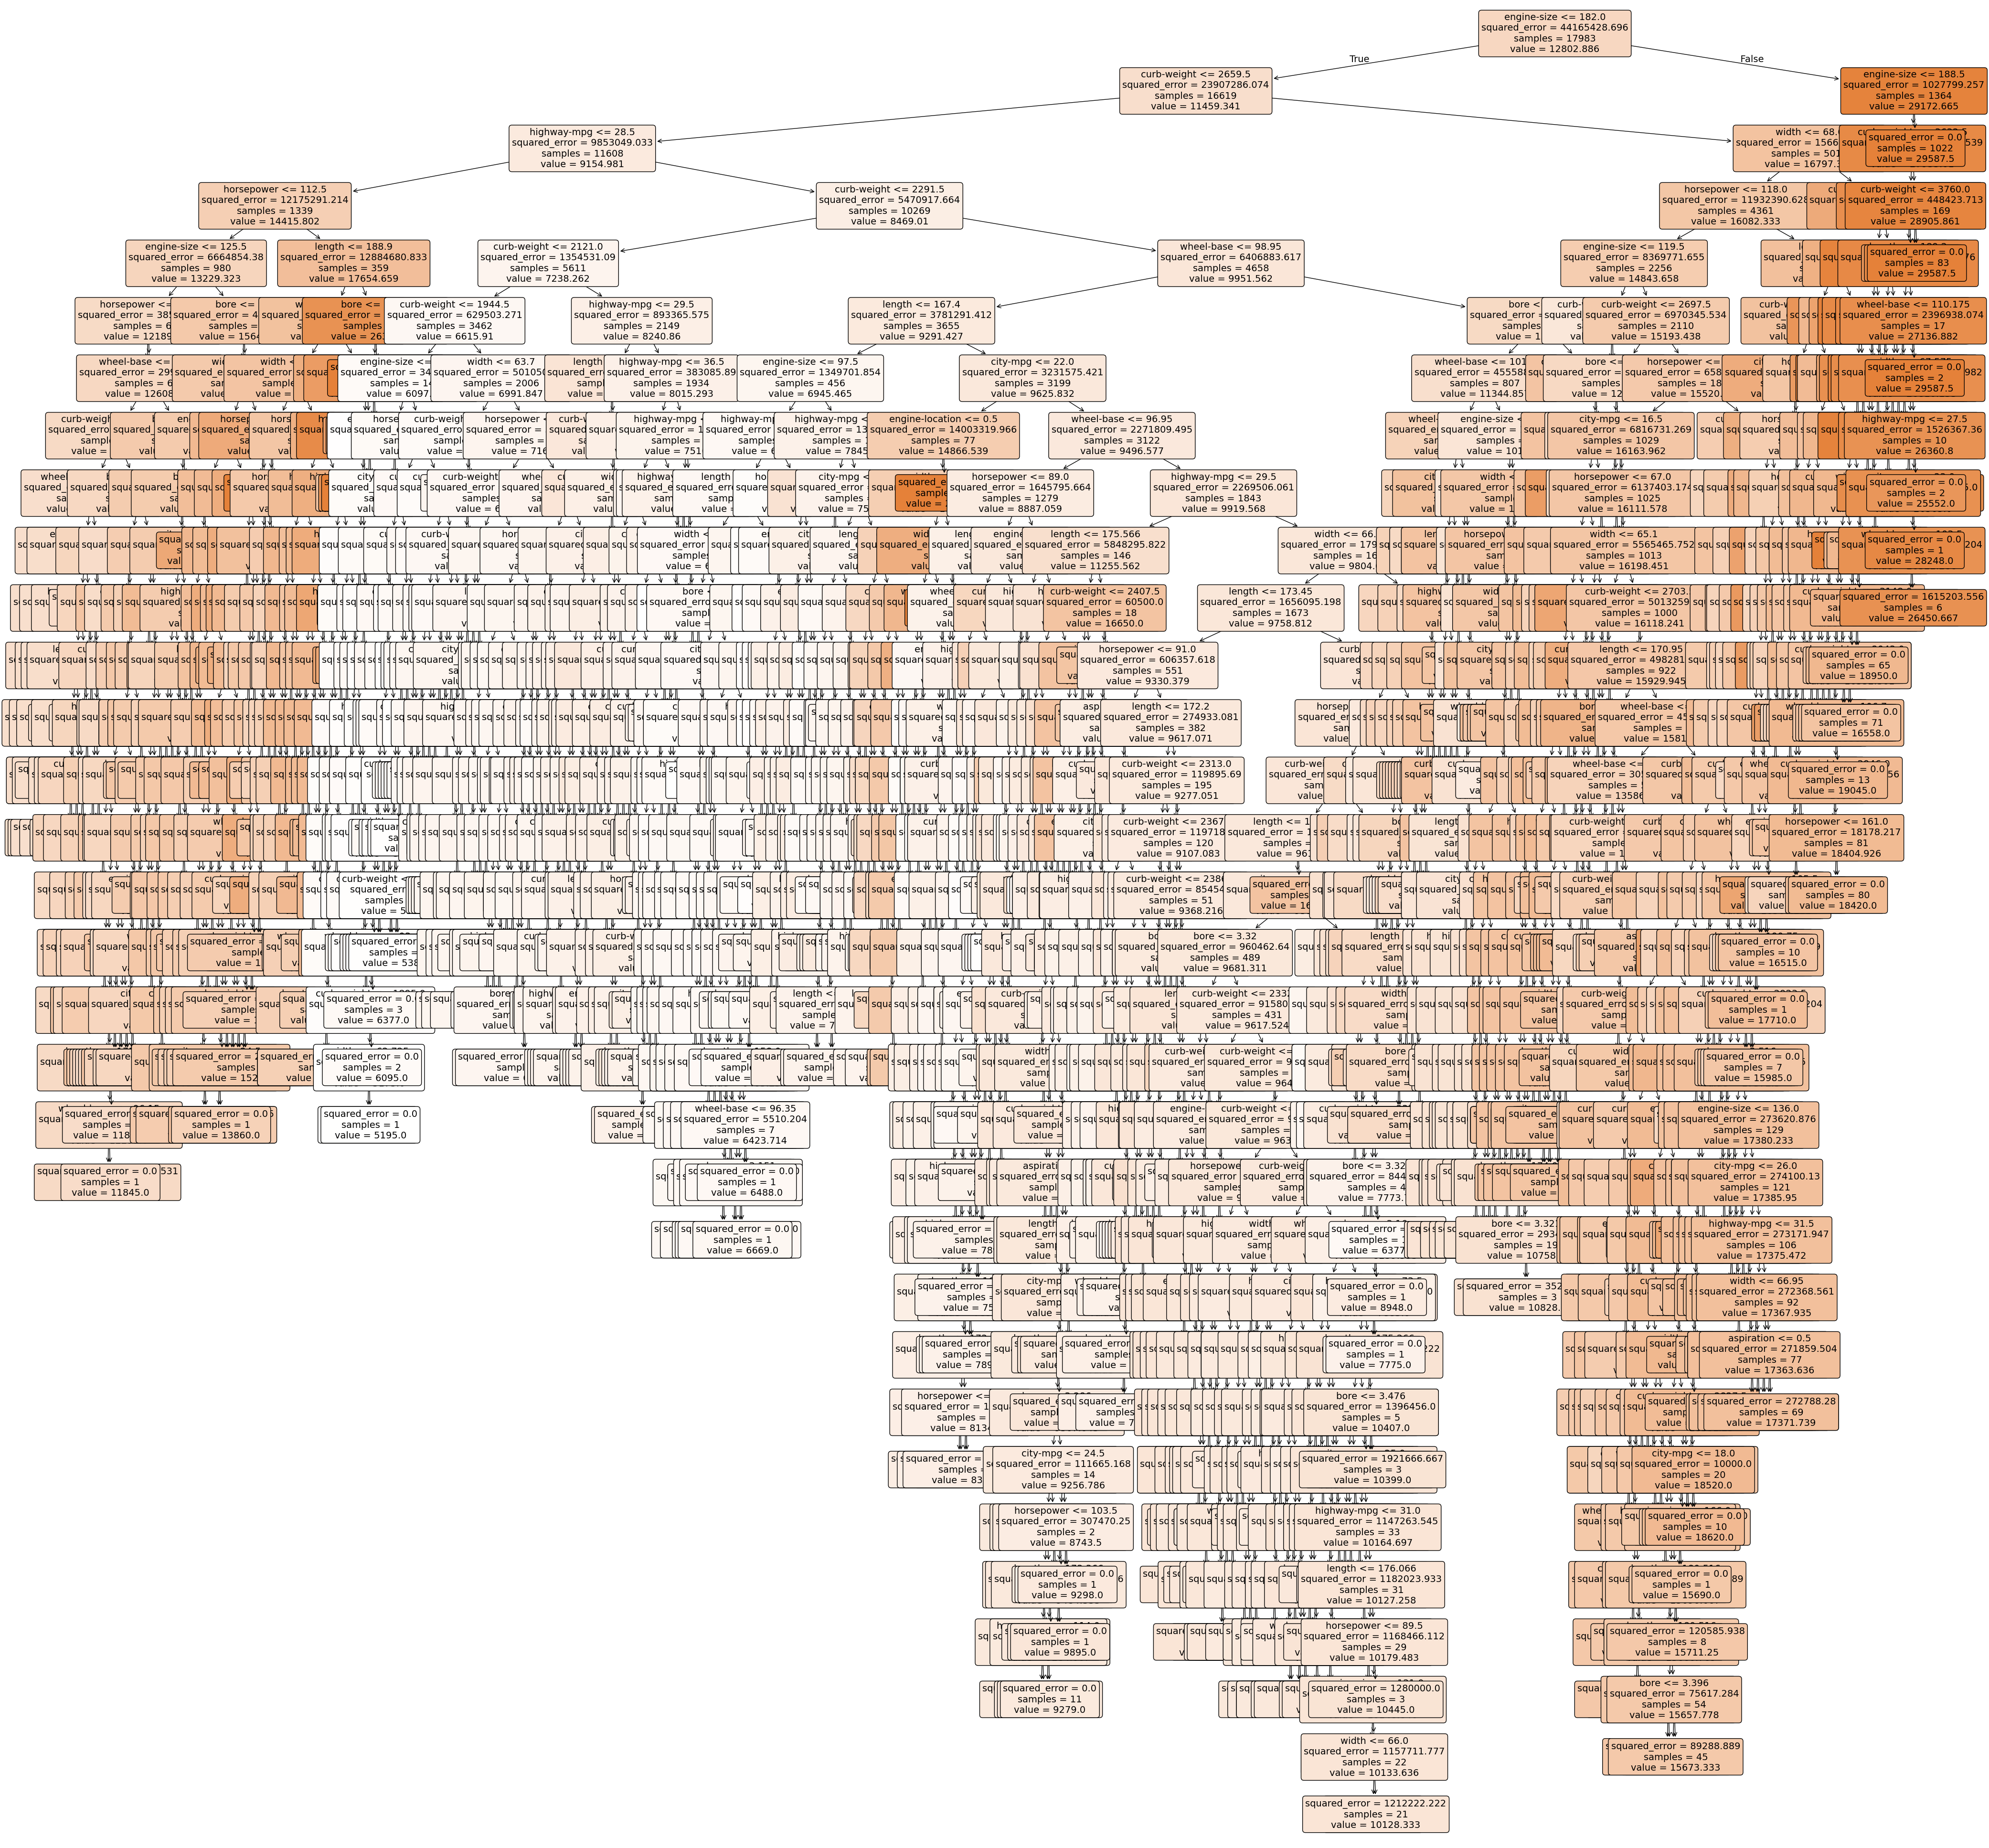

In [ ]:
plt.figure(figsize=(50,50))
a = plot_tree(model,
              feature_names=X_train.columns.tolist(), #???
              # class_names=y_train, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [ ]:
# user grid search to tunr params

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(model, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_split=5, splitter='random')
Best Score (R2): 0.9903664006134889
Test Score (R2): 0.9880098004241868


## Training the Random Forest Regression Model

This step involves building, training, and evaluating a Random Forest Regression model, which is an ensemble learning method that combines multiple decision trees to make more robust and accurate predictions. Random Forests often outperform single decision trees by reducing overfitting and improving generalization.

**Actions Performed:**

1.  **Model Instantiation:**
    * A Random Forest Regression model was instantiated using `RandomForestRegressor` from `sklearn.ensemble`. We started with initial hyperparameters, but these are typically tuned using techniques like GridSearchCV or RandomizedSearchCV for optimal performance.

2.  **Model Training:**
    * The instantiated Random Forest Regression model was trained on the training data (`X_train`, `y_train`) using the `.fit()` method. Training a Random Forest involves building multiple decision trees on different subsets of the data and features.

3.  **Model Evaluation on Test Set:**
    * The trained Random Forest model was used to make predictions on the unseen test data (`X_test`) using the `.predict()` method. The predictions are typically the average of the predictions from all the individual decision trees in the forest.
    * The performance of the model was evaluated using Mean Squared Error (MSE) and R-squared (R2 Score).

4.  **Feature Importance Analysis:**
    * Random Forests provide a measure of feature importance, indicating which features contributed most to the predictions. This can be useful for understanding the underlying relationships in the data.


**Insights:**

The performance metrics of the Random Forest model were compared to those of Linear Regression and the single Decision Tree. Random Forests often achieve better performance due to their ability to reduce variance and handle complex relationships. The feature importance analysis provides insights into which features the model relies on most heavily for prediction. The next crucial step would be to tune the hyperparameters of the Random Forest model (e.g., `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`) using cross-validation to further optimize its performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Separate features (X) and target (y)
X = updated_df.drop('price', axis=1)
y = updated_df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Instantiate the Random Forest Regressor model
# You can start with default hyperparameters and tune later
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 3. Make predictions on the test data
y_pred = rf_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r_squared:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 274893.71
R-squared (R^2): 0.99


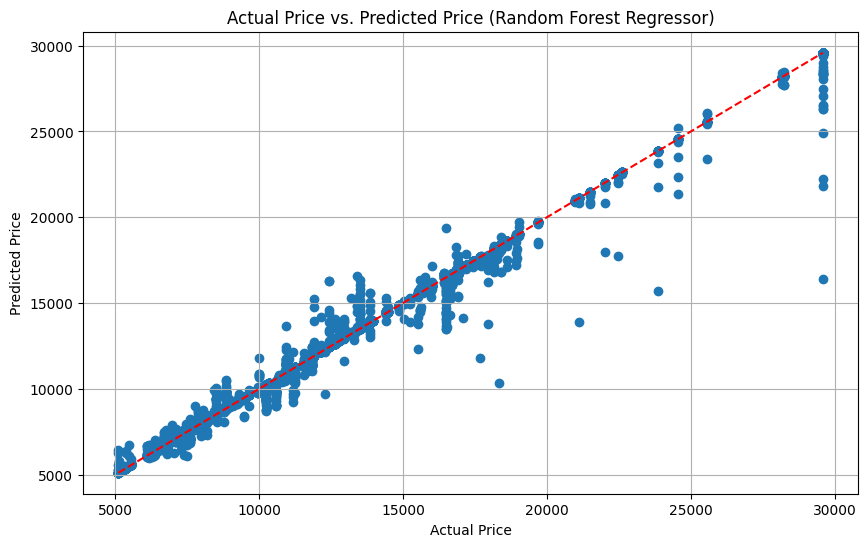

In [ ]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price (Random Forest Regressor)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.grid(True)
plt.show()

In [ ]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

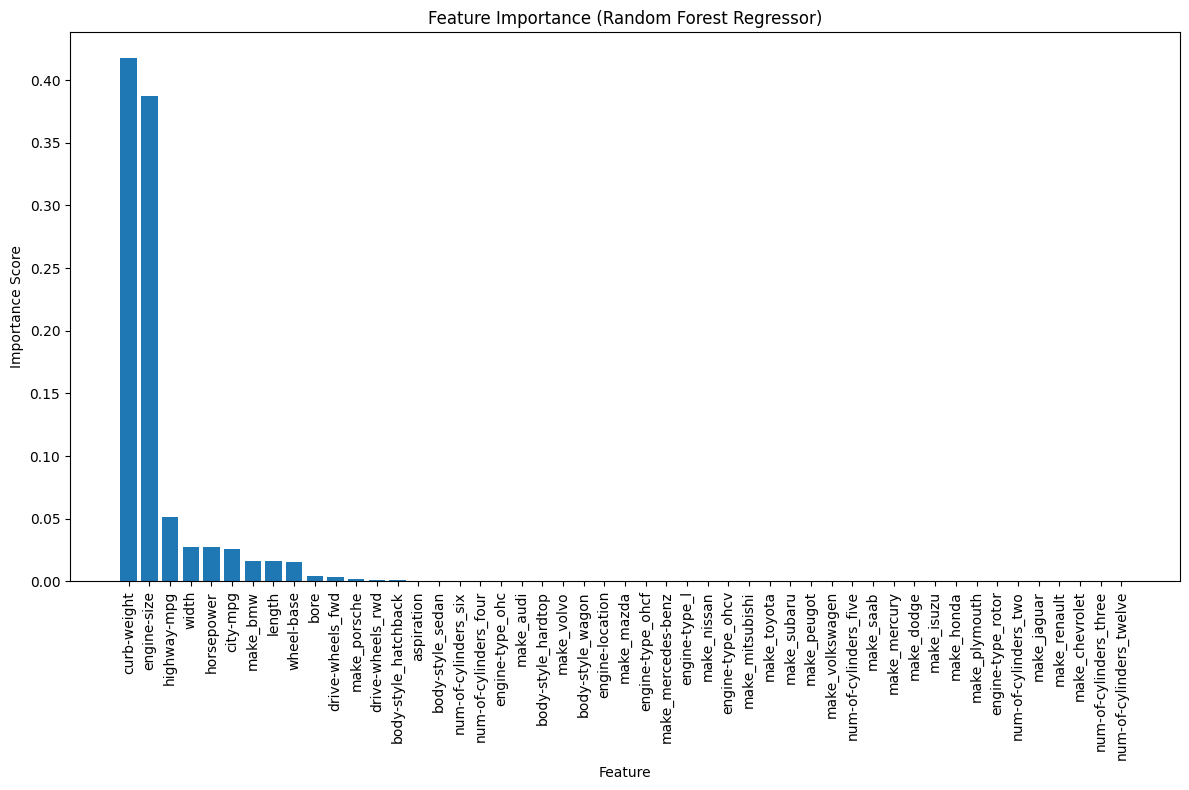

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importance (Random Forest Regressor)")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()